<a href="https://colab.research.google.com/github/AAhmadS/Regression_analysis/blob/main/R_HW2_md.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("dpylr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘dpylr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [2]:
R.version.string

[1] "R version 4.3.1 (2023-06-16)"

#loading dataset

In [3]:
library(remotes)
install.packages("devtools")
devtools::install_github("hadley/lazyeval")
devtools::install_github("hadley/dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘textshaping’, ‘shiny’, ‘downlit’, ‘ragg’, ‘htmlwidgets’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Warning message in install.packages("devtools"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘pkgdown’ had non-zero exit status”
Warning message in install.packages("devtools"):
“installation of package ‘devtools’ had non-zero exit status”



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpImgHo0/remotesf97245ac4c/hadley-lazyeval-f2ee93f/DESCRIPTION’ ... OK
* preparing ‘lazyeval’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘lazyeval_0.2.2.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




vctrs (0.6.2 -> 0.6.3) [CRAN]


Installing 1 packages: vctrs

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpImgHo0/remotesf91aeab367/tidyverse-dplyr-16b472f/DESCRIPTION’ ... OK
* preparing ‘dplyr’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* installing the package to process help pages
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Removed empty directory ‘dplyr/inst’
* building ‘dplyr_1.1.2.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
devtools::install_github("r-lib/lifecycle")


── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpImgHo0/remotesf91b2a3245/r-lib-lifecycle-9417eca/DESCRIPTION’ ... OK
* preparing ‘lifecycle’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘lifecycle_1.0.3.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [7]:
# loading data from every dataset
df2 <- read.csv('./diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df3 <- read.csv('./diabetes_binary_health_indicators_BRFSS2015.csv')

cat('df2 shape is:', dim(df2), '\n')
cat('df3 shape is:', dim(df3))

df2 shape is: 70692 22 
df3 shape is: 253680 22

In [8]:
head(df3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,1,40,1,0,0,0,0,⋯,1,0,5,18,15,1,0,9,4,3
2,0,0,0,0,25,1,0,0,1,0,⋯,0,1,3,0,0,0,0,7,6,1
3,0,1,1,1,28,0,0,0,0,1,⋯,1,1,5,30,30,1,0,9,4,8
4,0,1,0,1,27,0,0,0,1,1,⋯,1,0,2,0,0,0,0,11,3,6
5,0,1,1,1,24,0,0,0,1,1,⋯,1,0,2,3,0,0,0,11,5,4
6,0,1,1,1,25,1,0,0,1,1,⋯,1,0,2,0,2,0,1,10,6,8


In [9]:
str(df3)

'data.frame':	253680 obs. of  22 variables:
 $ Diabetes_binary     : num  0 0 0 0 0 0 0 0 1 0 ...
 $ HighBP              : num  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : num  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : num  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : num  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : num  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: num  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : num  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : num  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : num  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : num  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : num  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : num  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : num  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : num  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [10]:
colSums(is.na(df3))

Diabetes_binary               HighBP             HighChol 
                   0                    0                    0 
           CholCheck                  BMI               Smoker 
                   0                    0                    0 
              Stroke HeartDiseaseorAttack         PhysActivity 
                   0                    0                    0 
              Fruits              Veggies    HvyAlcoholConsump 
                   0                    0                    0 
       AnyHealthcare          NoDocbcCost              GenHlth 
                   0                    0                    0 
            MentHlth             PhysHlth             DiffWalk 
                   0                    0                    0 
                 Sex                  Age            Education 
                   0                    0                    0 
              Income 
                   0

no missing values have been found within data, lets get a summary of our variables, to have some visuals on the data


In [11]:
t(summary(df3))

                                                                          
Diabetes_binary      Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
    HighBP           Min.   :0.000     1st Qu.:0.000     Median :0.000    
   HighChol          Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
  CholCheck          Min.   :0.0000    1st Qu.:1.0000    Median :1.0000   
     BMI             Min.   :12.00     1st Qu.:24.00     Median :27.00    
    Smoker           Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
    Stroke           Min.   :0.00000   1st Qu.:0.00000   Median :0.00000  
HeartDiseaseorAttack Min.   :0.00000   1st Qu.:0.00000   Median :0.00000  
 PhysActivity        Min.   :0.0000    1st Qu.:1.0000    Median :1.0000   
    Fruits           Min.   :0.0000    1st Qu.:0.0000    Median :1.0000   
   Veggies           Min.   :0.0000    1st Qu.:1.0000    Median :1.0000   
HvyAlcoholConsump    Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
AnyHealthcare        Min.



some real useful information has been brought out:
...notably the imbalance severeness is obvious in this summary
...by checking other vaiables' imbalanceness, some hypothesis's come to mind, assumptions as: those with below 0.4 mean tend to have positive correlation with having diabetes, where as those with mean above 0.6 seem to take the negative side.

In the next section duplicates are being checked




In [12]:
duplicates <- df3[duplicated(df3),]
print(paste("Duplicate Rows : ",nrow(duplicates)))
head(duplicates)

[1] "Duplicate Rows :  24206"


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1243,1,1,1,1,27,1,0,0,0,0,⋯,1,0,5,0,30,1,0,10,4,5
1564,0,0,0,1,21,1,0,0,1,1,⋯,1,0,1,0,0,0,0,4,6,8
2701,0,0,0,1,32,0,0,0,1,1,⋯,1,0,2,0,0,0,0,5,6,8
3161,0,0,0,1,21,0,0,0,1,1,⋯,1,0,1,0,0,0,0,4,6,8
3333,0,0,0,1,24,0,0,0,1,1,⋯,1,0,1,0,0,0,1,9,6,8
3724,0,0,0,1,22,0,0,0,1,1,⋯,1,0,2,0,0,0,0,5,5,8


In [13]:
#moving categorical data to unit8 inorder to be reserving on memory
data_clean <- function(dataframe){

  bins <- c(0, 18.5, 24.9, 29.9, Inf)
  labels <- c(1,2,3,4)

  df <- dataframe %>%
    distinct() %>%
    mutate(BMI_bins = cut(BMI, breaks = bins, labels = labels)) %>%
    mutate_at(vars(Diabetes_binary:BMI_bins), as.integer)

  return(df)
}

In [14]:
df <- data_clean(df3)
df2_clean <- data_clean(df2)

In [15]:
rownames(df2_clean) <- NULL

In [16]:
rownames(df) <- NULL
head(df)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,1,1,40,1,0,0,0,0,⋯,0,5,18,15,1,0,9,4,3,4
2,0,0,0,0,25,1,0,0,1,0,⋯,1,3,0,0,0,0,7,6,1,3
3,0,1,1,1,28,0,0,0,0,1,⋯,1,5,30,30,1,0,9,4,8,3
4,0,1,0,1,27,0,0,0,1,1,⋯,0,2,0,0,0,0,11,3,6,3
5,0,1,1,1,24,0,0,0,1,1,⋯,0,2,3,0,0,0,11,5,4,2
6,0,1,1,1,25,1,0,0,1,1,⋯,0,2,0,2,0,1,10,6,8,3


lets see the changes we've made

In [17]:
str(df)

'data.frame':	229474 obs. of  23 variables:
 $ Diabetes_binary     : int  0 0 0 0 0 0 0 0 1 0 ...
 $ HighBP              : int  1 0 1 1 1 1 1 1 1 0 ...
 $ HighChol            : int  1 0 1 0 1 1 0 1 1 0 ...
 $ CholCheck           : int  1 0 1 1 1 1 1 1 1 1 ...
 $ BMI                 : int  40 25 28 27 24 25 30 25 30 24 ...
 $ Smoker              : int  1 1 0 0 0 1 1 1 1 0 ...
 $ Stroke              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HeartDiseaseorAttack: int  0 0 0 0 0 0 0 0 1 0 ...
 $ PhysActivity        : int  0 1 0 1 1 1 0 1 0 0 ...
 $ Fruits              : int  0 0 1 1 1 1 0 0 1 0 ...
 $ Veggies             : int  1 0 0 1 1 1 0 1 1 1 ...
 $ HvyAlcoholConsump   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AnyHealthcare       : int  1 0 1 1 1 1 1 1 1 1 ...
 $ NoDocbcCost         : int  0 1 1 0 0 0 0 0 0 0 ...
 $ GenHlth             : int  5 3 5 2 2 2 3 3 5 2 ...
 $ MentHlth            : int  18 0 30 0 3 0 0 0 30 0 ...
 $ PhysHlth            : int  15 0 30 0 0 2 14 0 30 0 ...
 $ DiffWalk          

In [18]:
t(summary(df, include = "all"))

                                                                          
Diabetes_binary      Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
    HighBP           Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
   HighChol          Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
  CholCheck          Min.   :0.0000    1st Qu.:1.0000    Median :1.0000   
     BMI             Min.   :12.00     1st Qu.:24.00     Median :27.00    
    Smoker           Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
    Stroke           Min.   :0.00000   1st Qu.:0.00000   Median :0.00000  
HeartDiseaseorAttack Min.   :0.0000    1st Qu.:0.0000    Median :0.0000   
 PhysActivity        Min.   :0.000     1st Qu.:0.000     Median :1.000    
    Fruits           Min.   :0.0000    1st Qu.:0.0000    Median :1.0000   
   Veggies           Min.   :0.0000    1st Qu.:1.0000    Median :1.0000   
HvyAlcoholConsump    Min.   :0.00000   1st Qu.:0.00000   Median :0.00000  
AnyHealthcare        Min.

##Grouping variables

In [19]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [20]:
library(plyr)
library(dplyr)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [21]:
install.packages("tidyverse")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [23]:
library(tidyverse)
library(ggplot2)

In [24]:
target <- 'Diabetes_binary'
bool_vars <- list("HighBP","HighChol","CholCheck","Smoker","Stroke","HeartDiseaseorAttack","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","DiffWalk","Sex")
num_vars <- names(df)[which(!(names(df) %in% bool_vars) & names(df) != target)]

In [25]:
num_vars

[1] "BMI"       "GenHlth"   "MentHlth"  "PhysHlth"  "Age"       "Education"
[7] "Income"    "BMI_bins"

##check for imbalances


     1      0 
 35097 194377 

       0        1 
84.70546 15.29454 


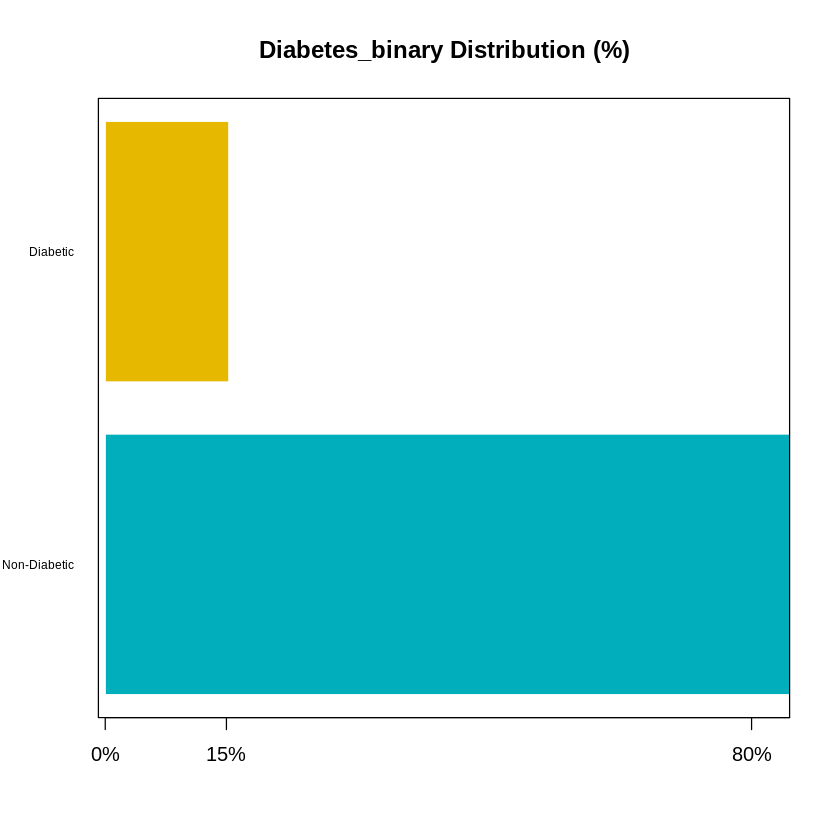

In [26]:
print(sort(table(df$Diabetes_binary), decreasing = FALSE))
print(prop.table(table(df$Diabetes_binary))*100)

barplot(prop.table(table(df$Diabetes_binary))*100,
        main = "Diabetes_binary Distribution (%)",
        ylab = "",
        xlab = "",
        col = c("#00AFBB", "#E7B800"),
        border = "white",
        names.arg = c("Non-Diabetic", "Diabetic"),
        las = 2,
        cex.names = 0.6,
        cex.main = 1.2,
        cex.lab = 1.2,
        horiz = TRUE,
        axes = FALSE)
axis(side = 1, at = c(0, 15,80,100), labels = c("0%","15%","80%","100%"))
box()

##analysis of categorical variables

In [27]:
library(tidyverse)
library(ggplot2)

In [28]:
install.packages("dplyr")          # Install & load dplyr package
library("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [29]:
install.packages("plyr")
library("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [30]:
color_binary = c("blue", "red")

analyse_cat <- function(var,dataframe) {
  df1 <- dataframe
  df1$Diabetes_binary <- factor(df1$Diabetes_binary, levels = c(0, 1), labels = c("Non_Diabetic", "Diabetic"))
  df1[,var] <- factor(df[[var]], levels = c(0, 1), labels = c("No", "Yes"))

  plot_data <- df1 %>%
    group_by(Diabetes_binary, !!sym(var)) %>%
    dplyr::summarise(count = n(), .groups = 'drop') %>%
    pivot_wider(names_from = Diabetes_binary, values_from = count) %>%
    mutate(Non_Diabetic = Non_Diabetic / sum(Non_Diabetic)) %>%
    mutate(Diabetic = Diabetic / sum(Diabetic)) %>%
    gather(Diabetes_binary, prop, -!!sym(var))


  plot <- ggplot(plot_data, aes(x = prop, y = Diabetes_binary, fill = !!sym(var))) +
    geom_bar(stat = "identity", position = "stack") +
    scale_fill_manual(values = color_binary) +
    xlim(0, 1) +
    xlab("Proportion") +
    ylab("Diabetes") +
    labs(title = var, fill=var) +  # Set the title
    theme_minimal() +
    theme(legend.position = "top", legend.title = element_blank())

  print(plot)
}

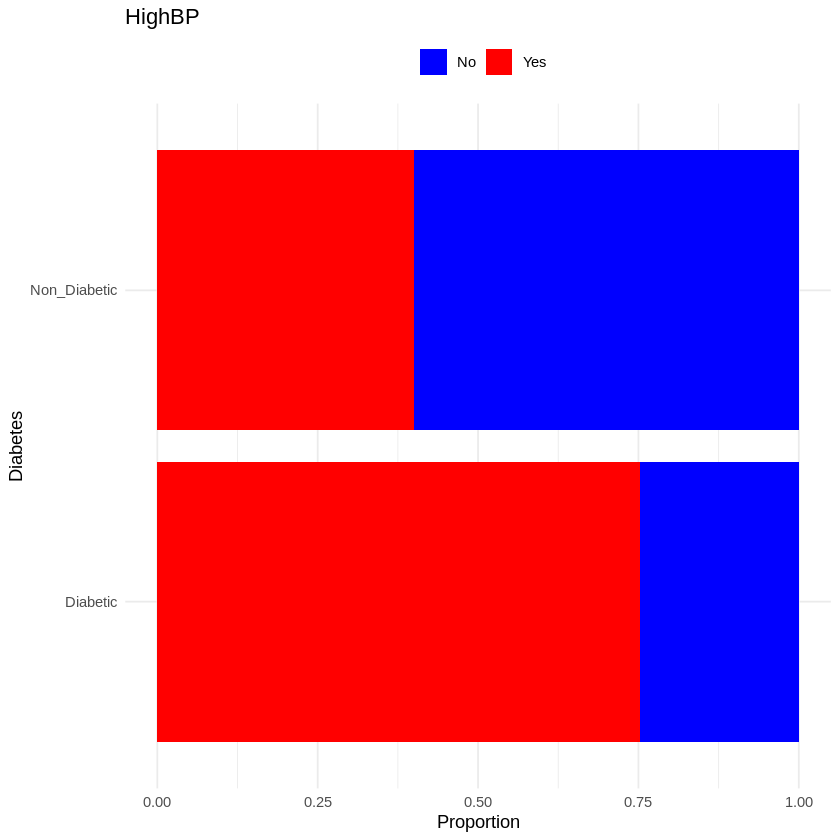

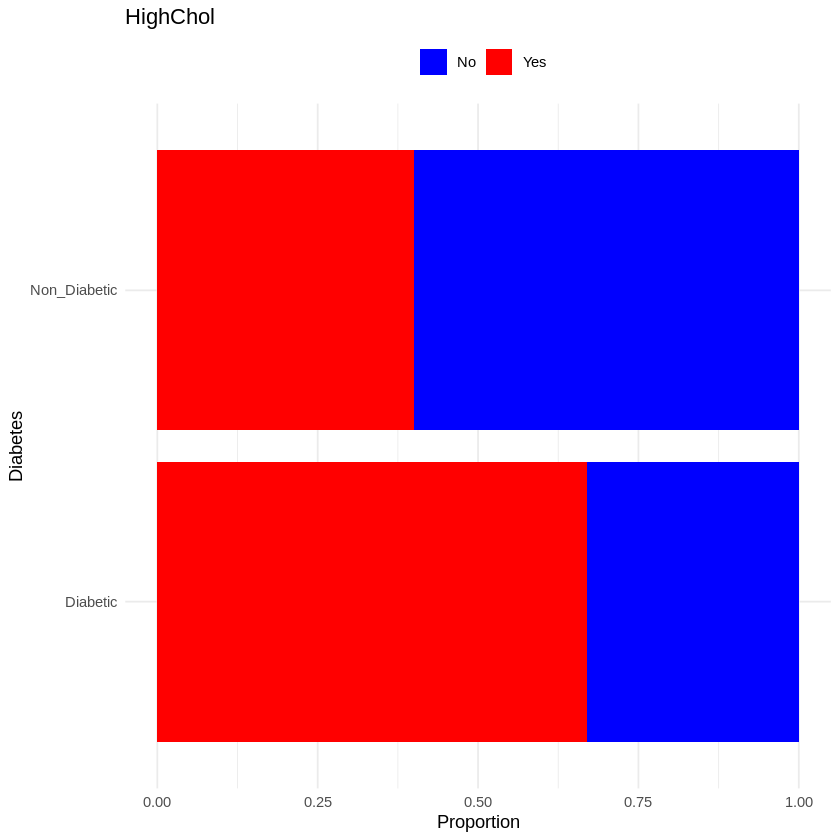

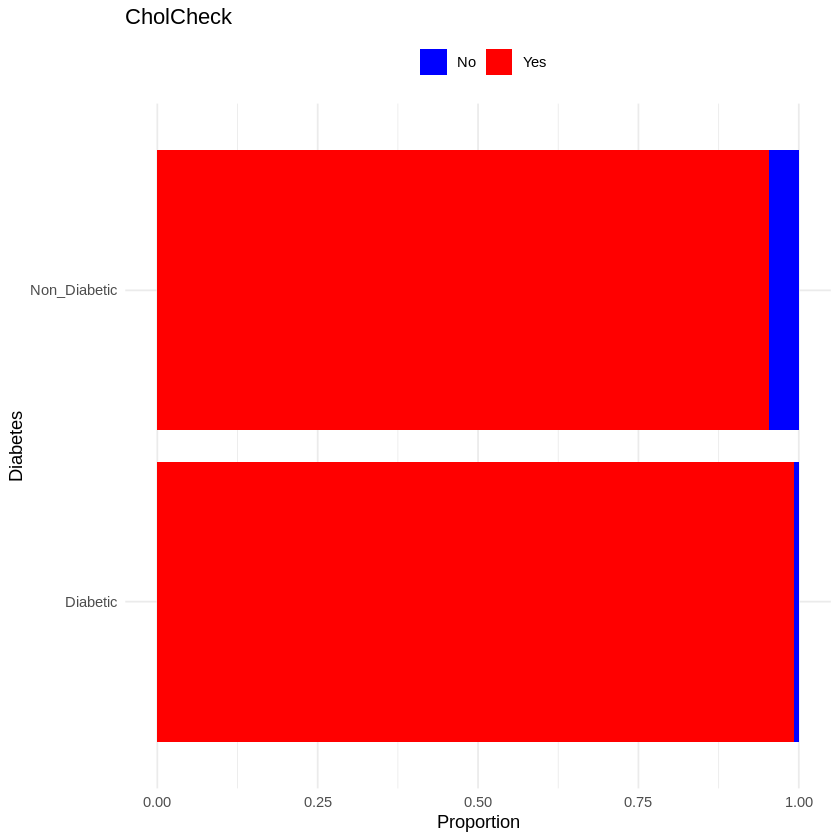

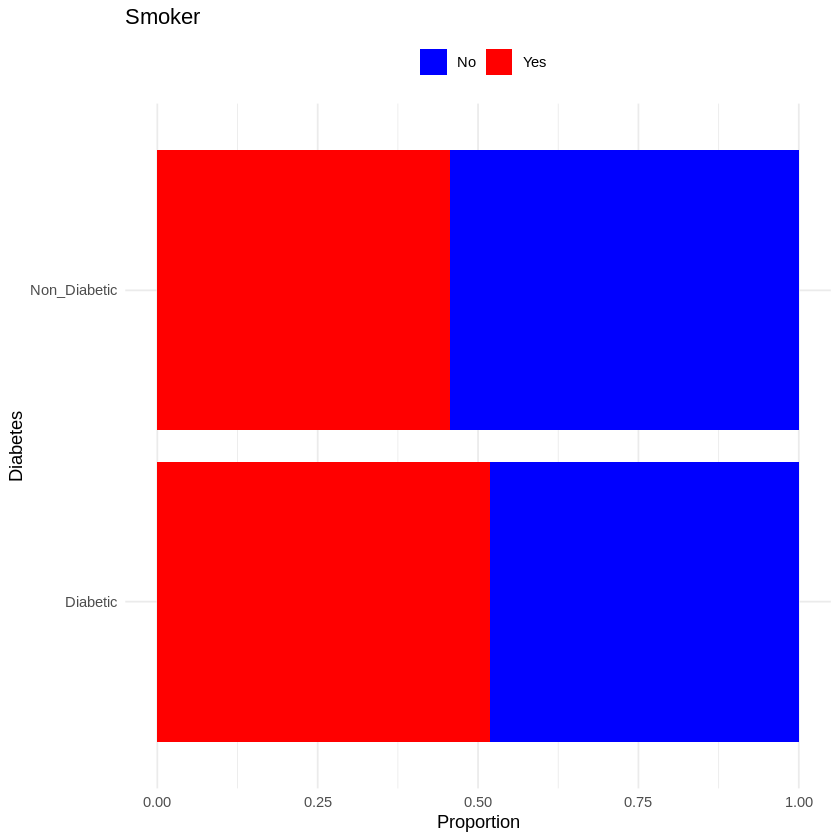

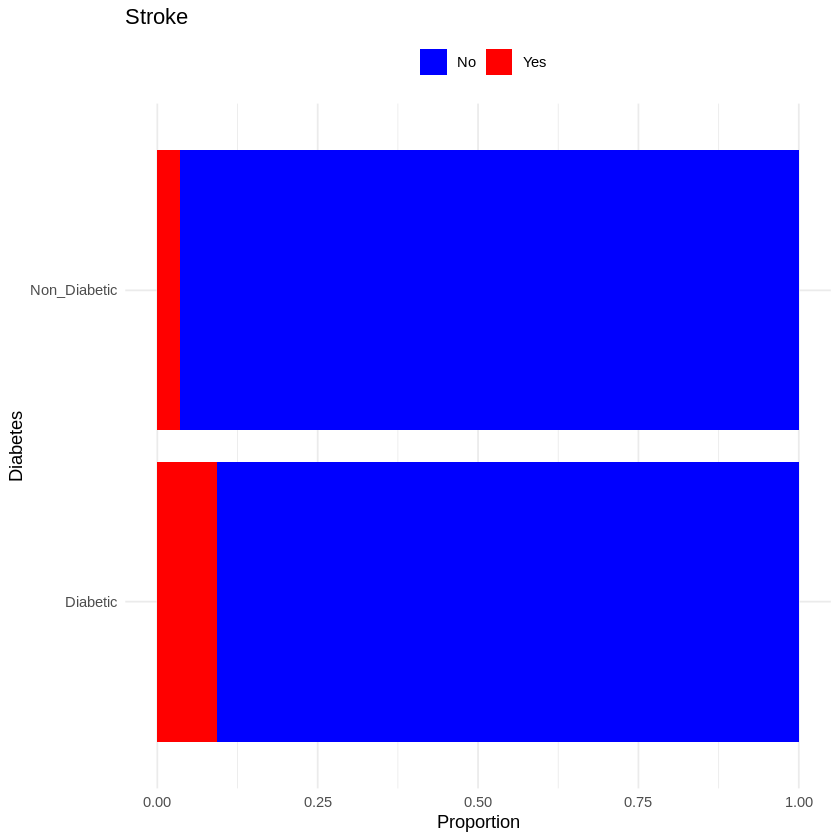

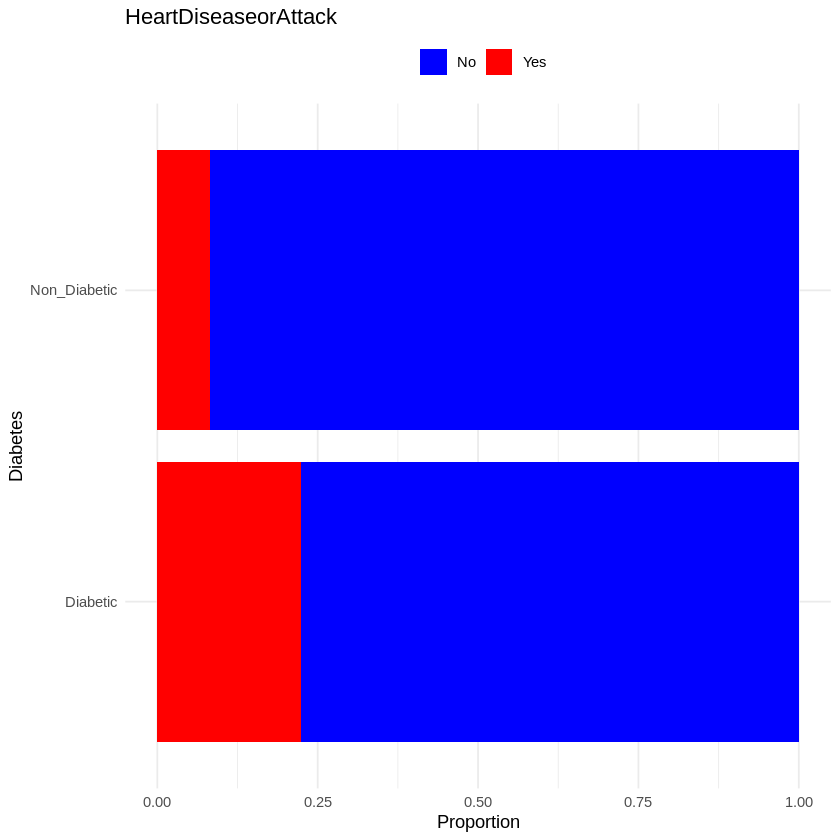

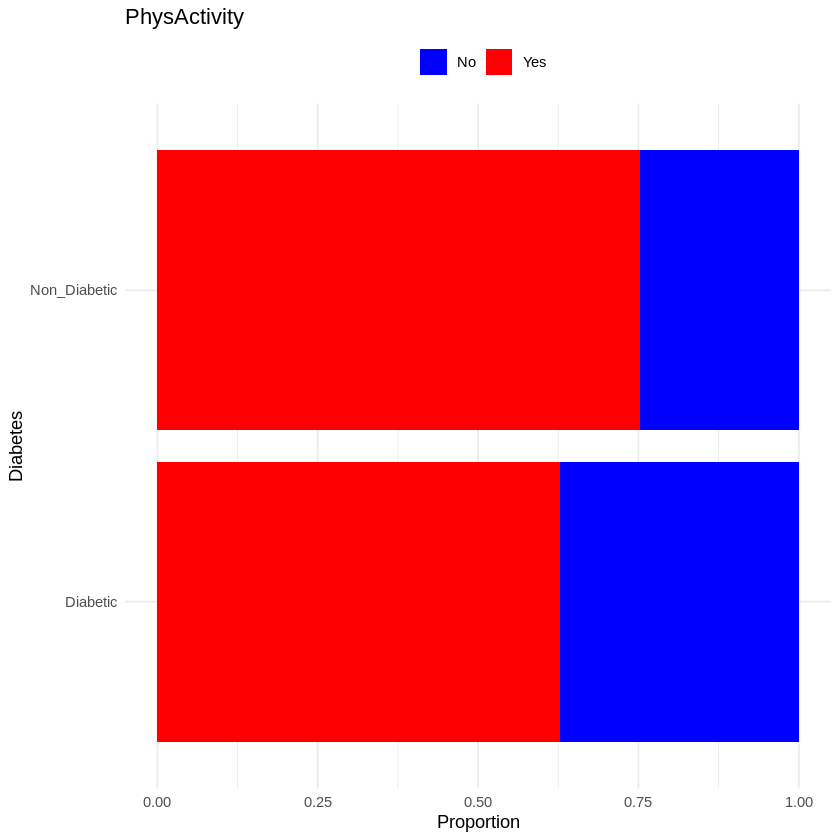

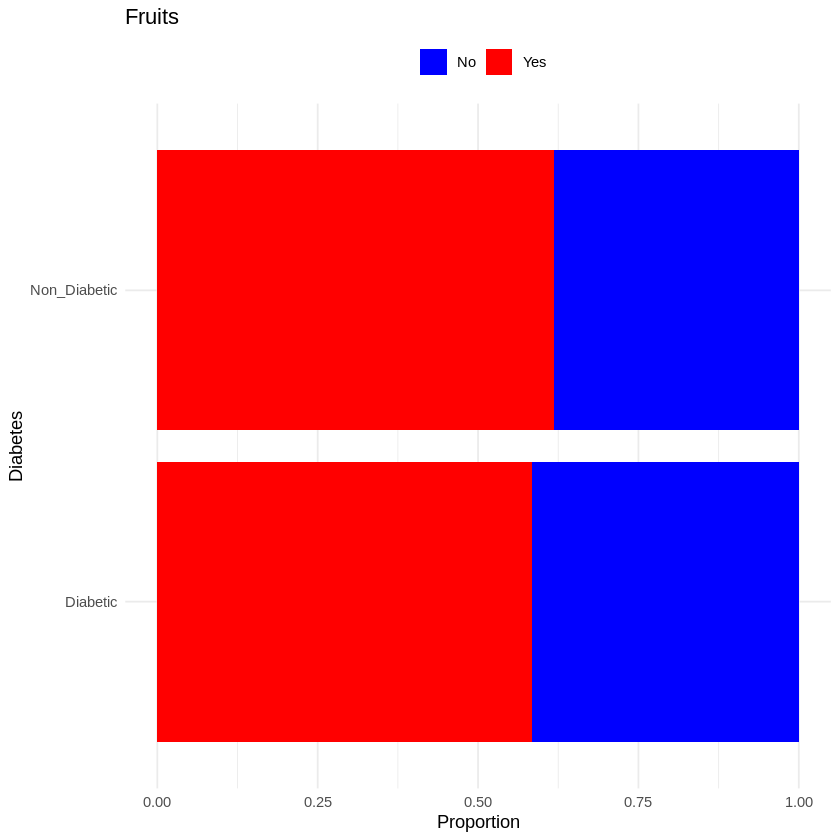

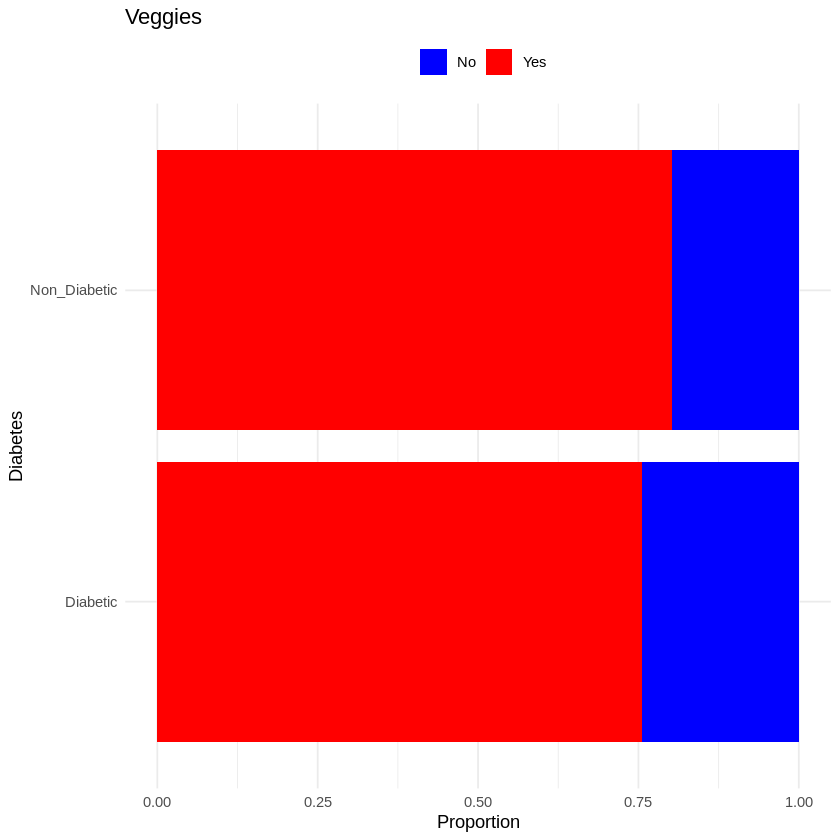

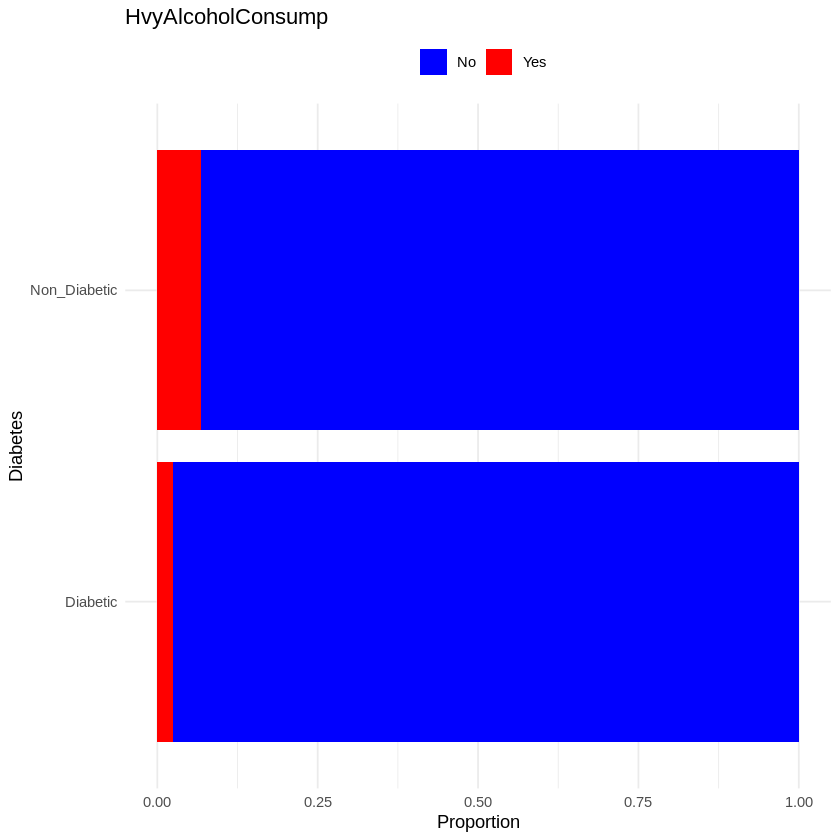

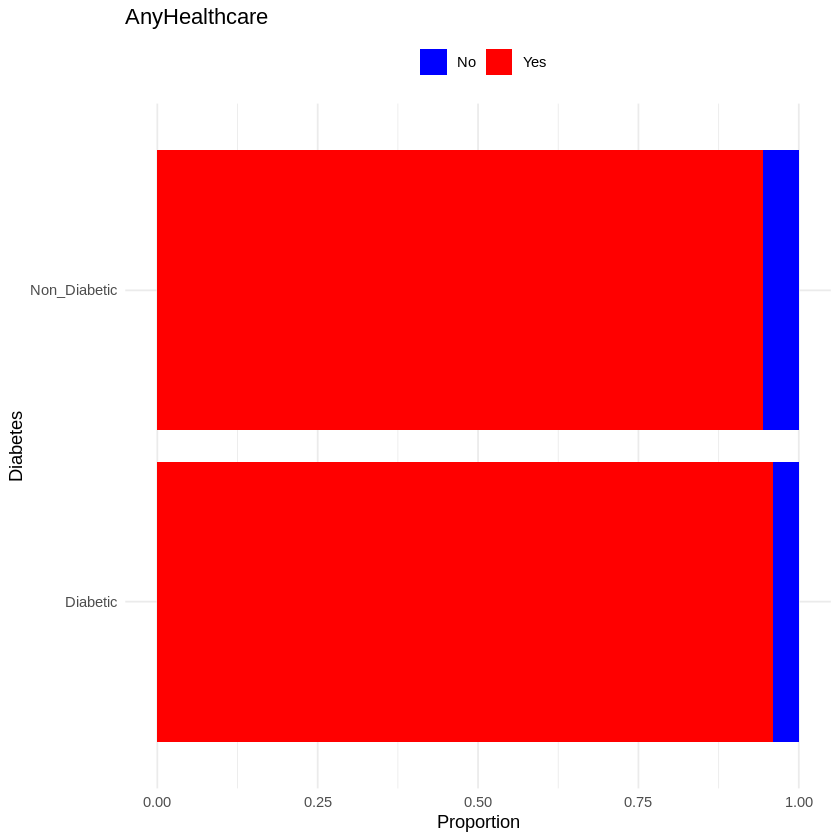

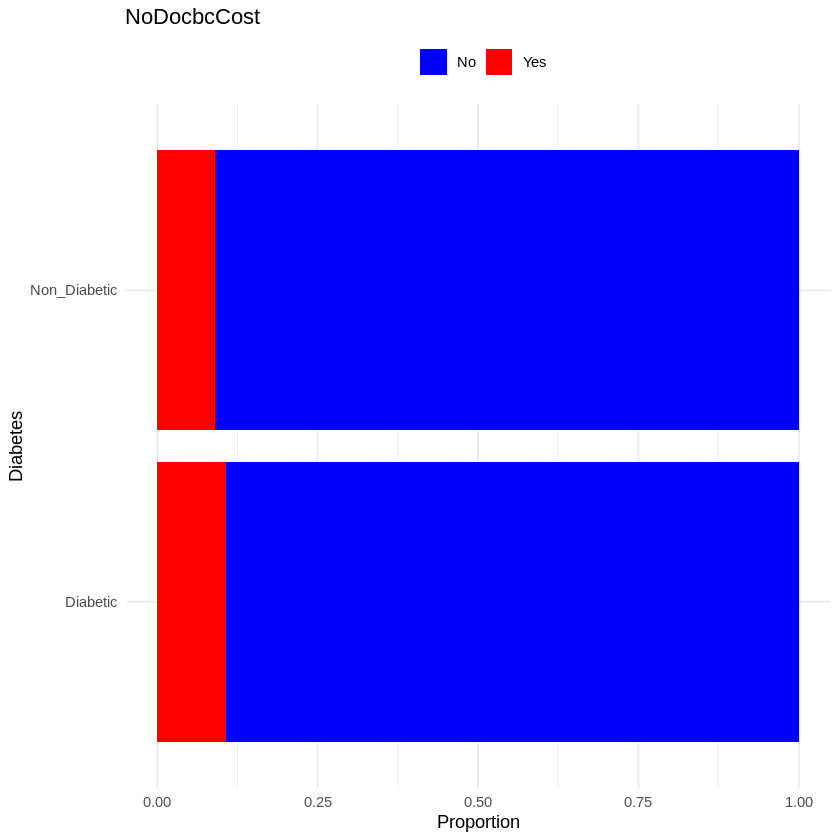

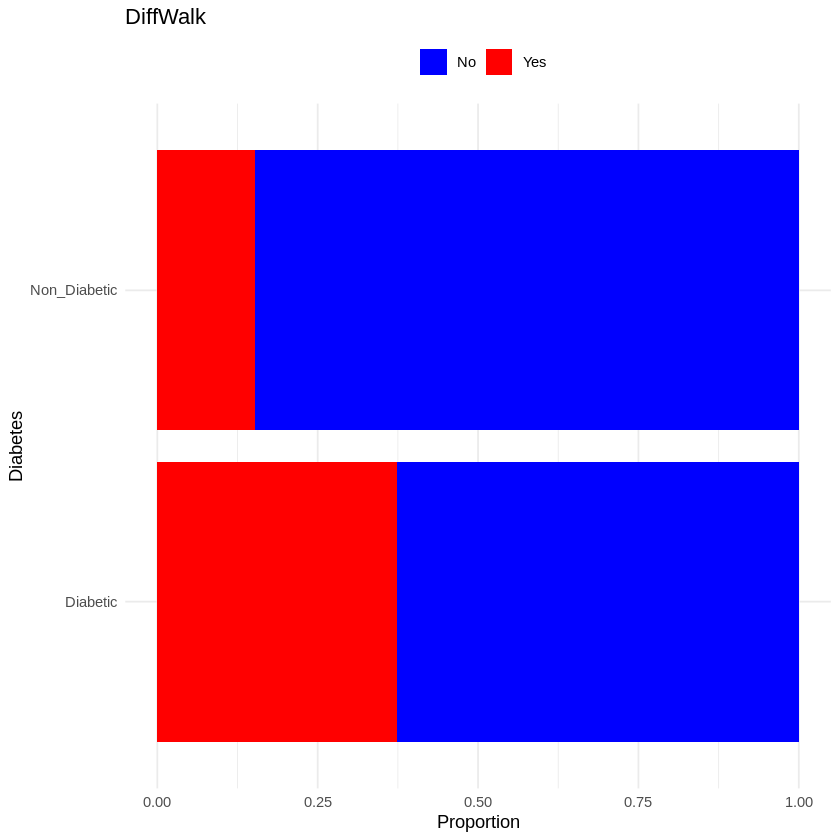

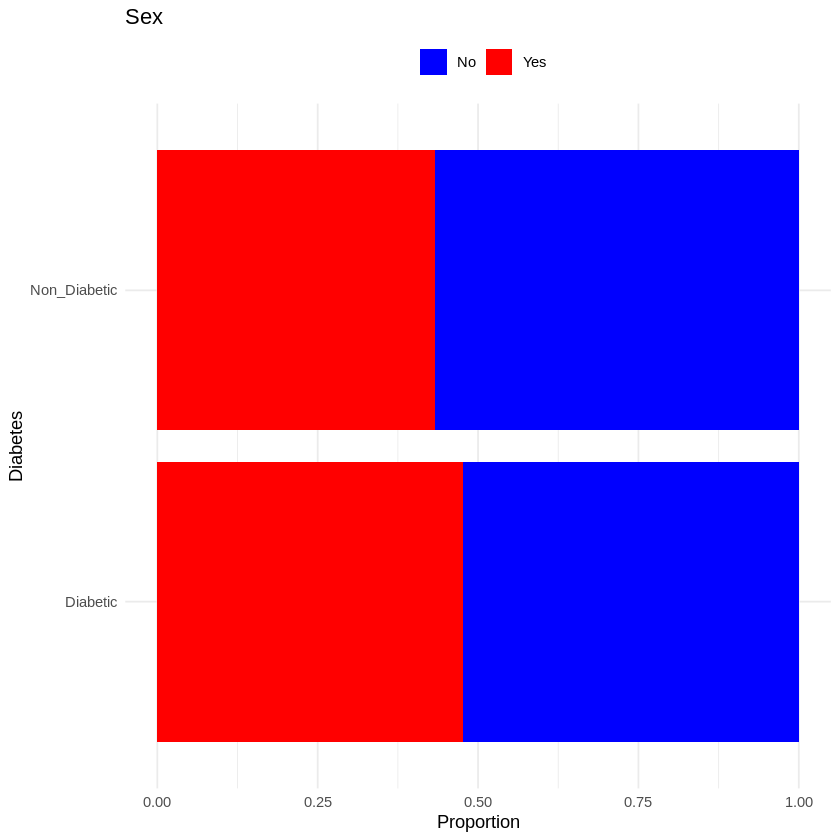

In [31]:
for (var in bool_vars) {
    analyse_cat(var,df)
}

#Answer to question 1:

**having the results and the plots of categorical data, it seems like that proportion gap of some variables within diabetics and non-diabetics data, are significant enough to make them suitable predictors parameters as :**
>DiffWalk <br/>
>HvyAlcoholConsump<br/>
>HeartDiseaseorAttack<br/>
>Stroke<br/>
>CholCheck<br/>
>HighBP

most of varibles listed above actually match perfectly with logical sense, talking about being diabetic.

##analysis of numeric data

In [32]:
summary(df[num_vars]) %>% t()

                                                                               
     BMI    Min.   :12.00    1st Qu.:24.00    Median :27.00    Mean   :28.69   
   GenHlth  Min.   :1.000    1st Qu.:2.000    Median :3.000    Mean   :2.602   
   MentHlth Min.   : 0.00    1st Qu.: 0.00    Median : 0.00    Mean   : 3.51   
   PhysHlth Min.   : 0.000   1st Qu.: 0.000   Median : 0.000   Mean   : 4.681  
     Age    Min.   : 1.000   1st Qu.: 6.000   Median : 8.000   Mean   : 8.085  
  Education Min.   :1.00     1st Qu.:4.00     Median :5.00     Mean   :4.98    
    Income  Min.   :1.000    1st Qu.:4.000    Median :6.000    Mean   :5.889   
   BMI_bins Min.   :1.000    1st Qu.:2.000    Median :3.000    Mean   :3.087   
                                             
     BMI    3rd Qu.:32.00    Max.   :98.00   
   GenHlth  3rd Qu.:3.000    Max.   :5.000   
   MentHlth 3rd Qu.: 2.00    Max.   :30.00   
   PhysHlth 3rd Qu.: 4.000   Max.   :30.000  
     Age    3rd Qu.:10.000   Max.   :13.000  
  Ed

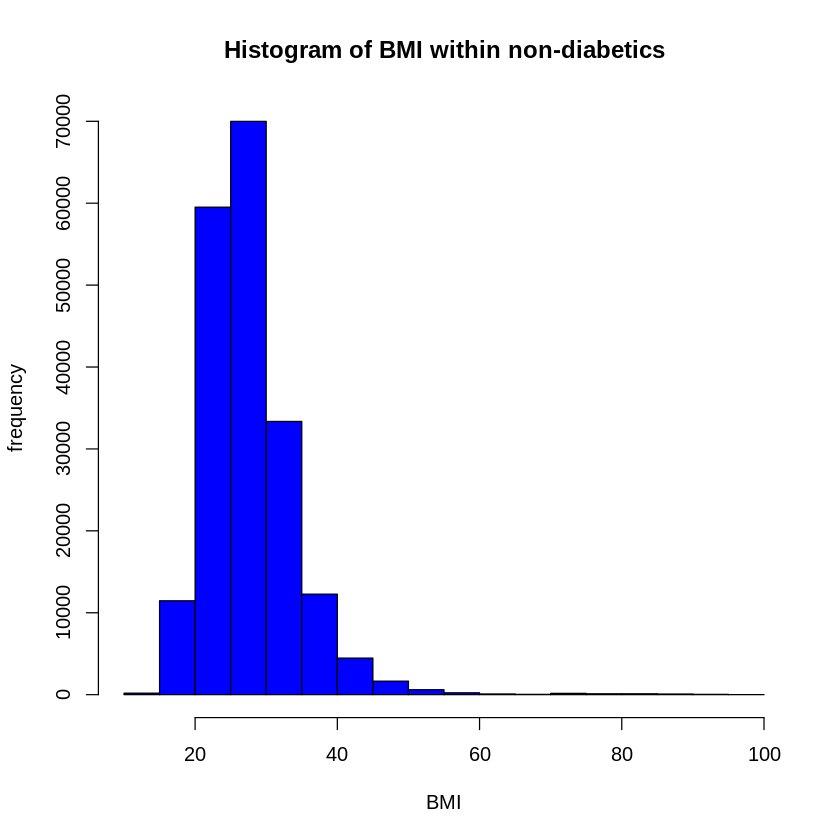

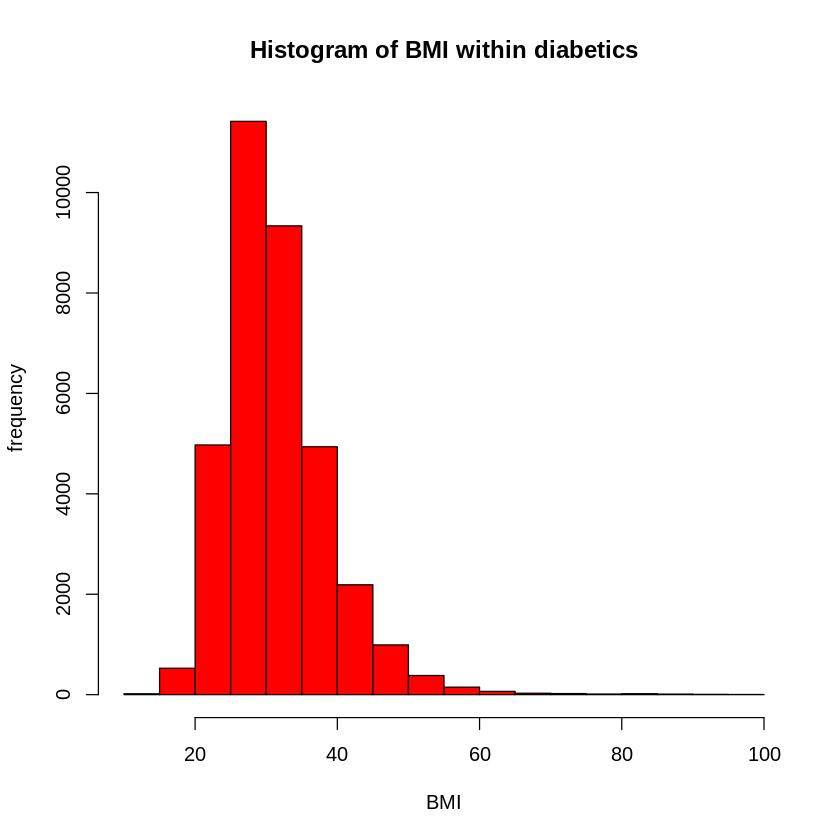

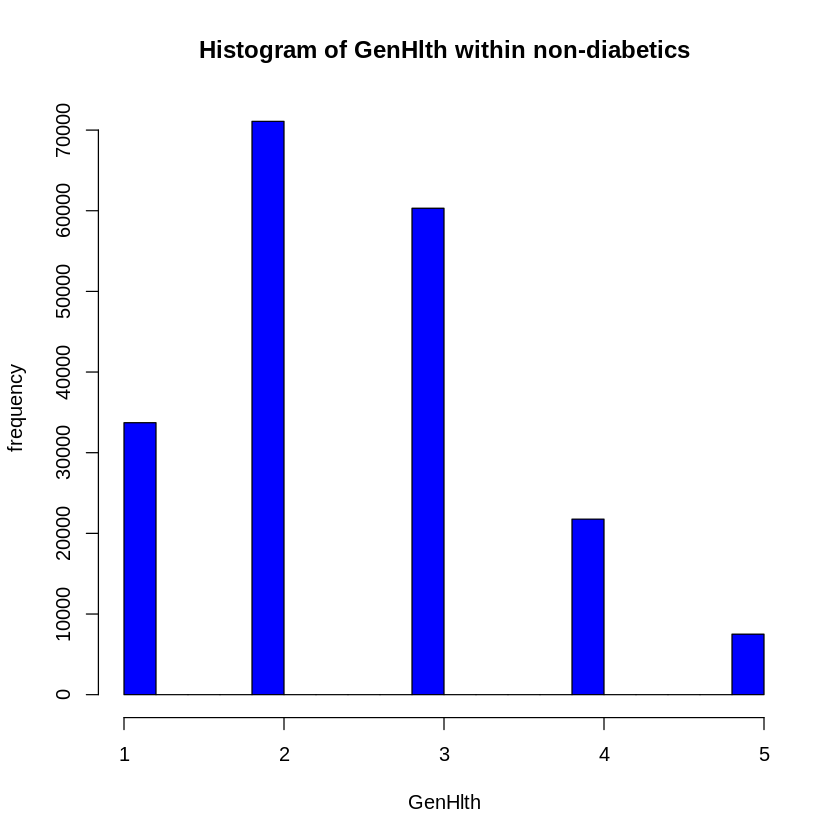

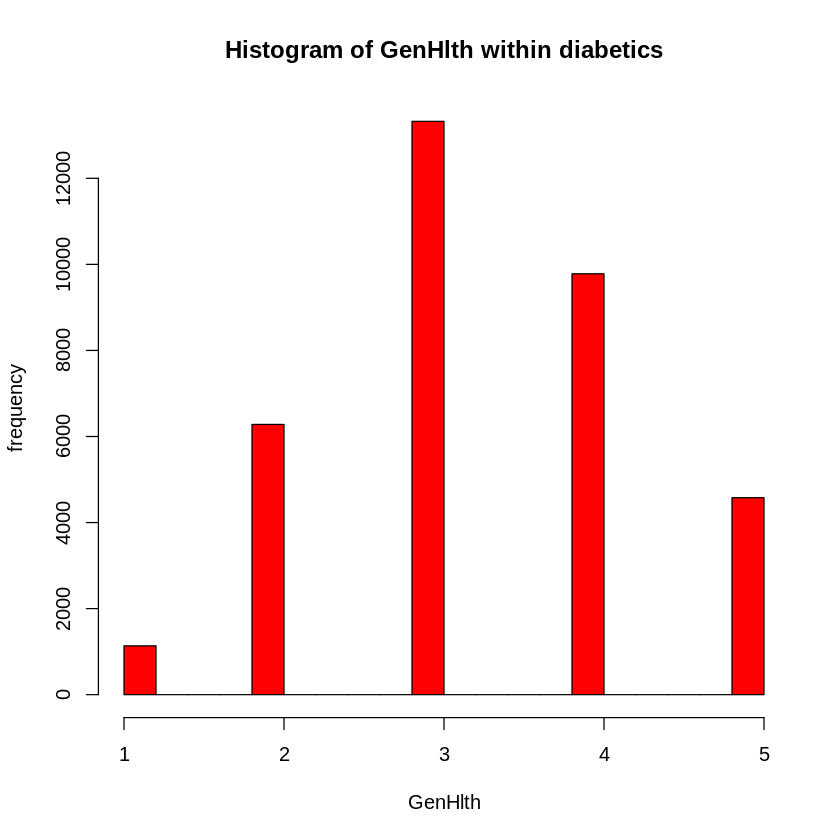

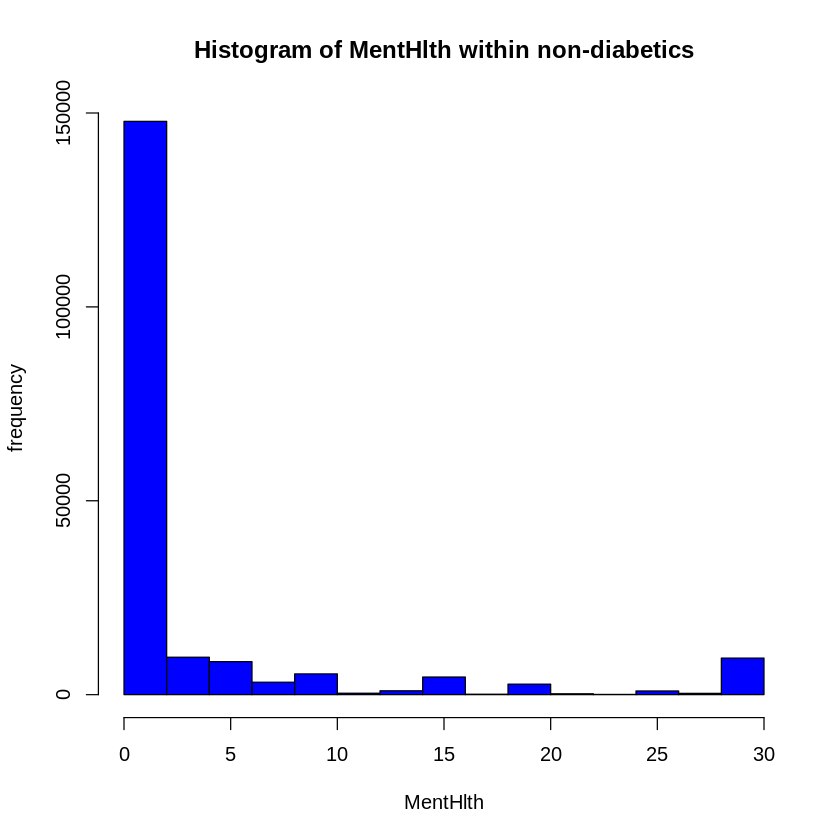

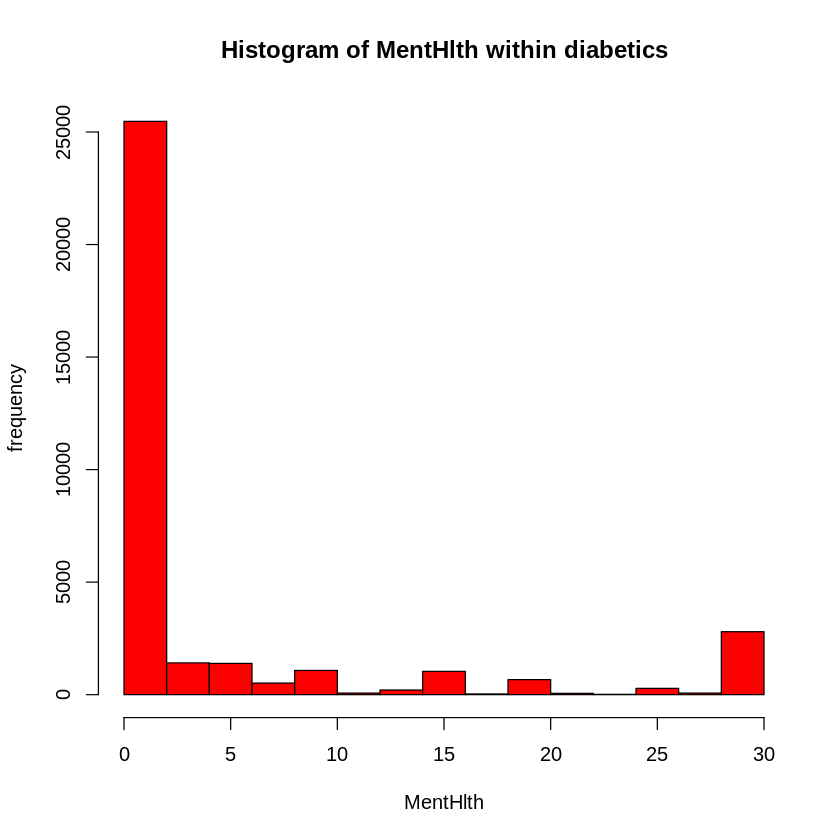

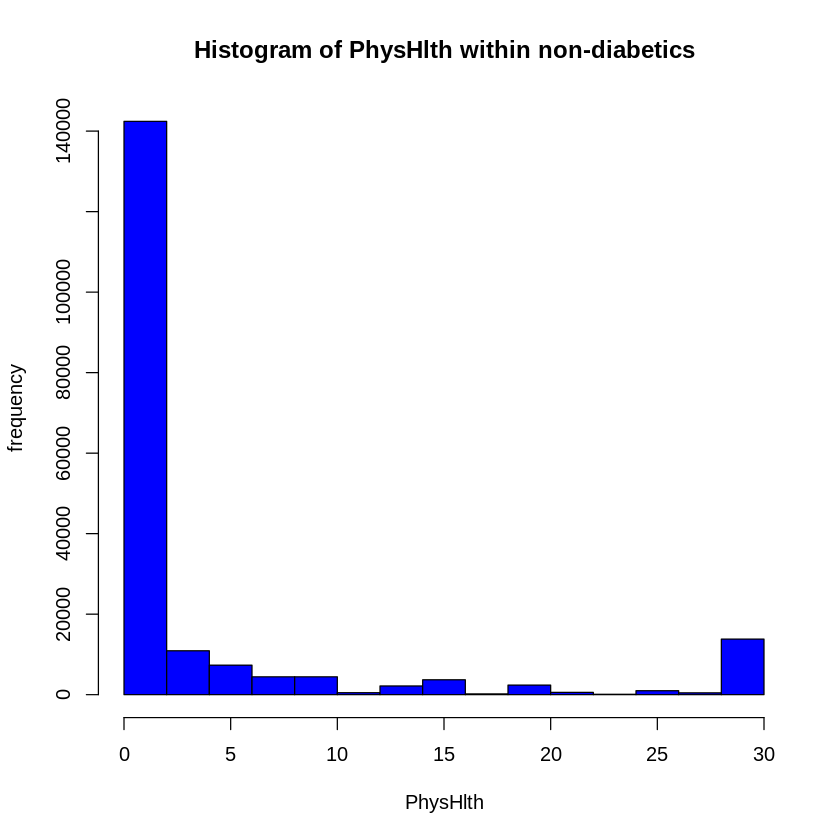

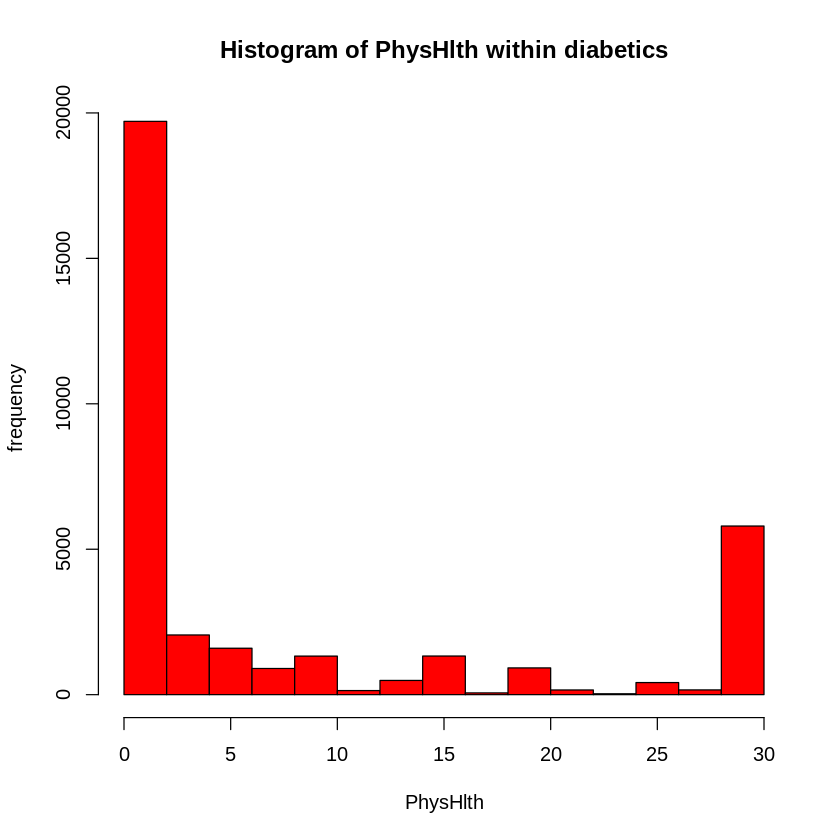

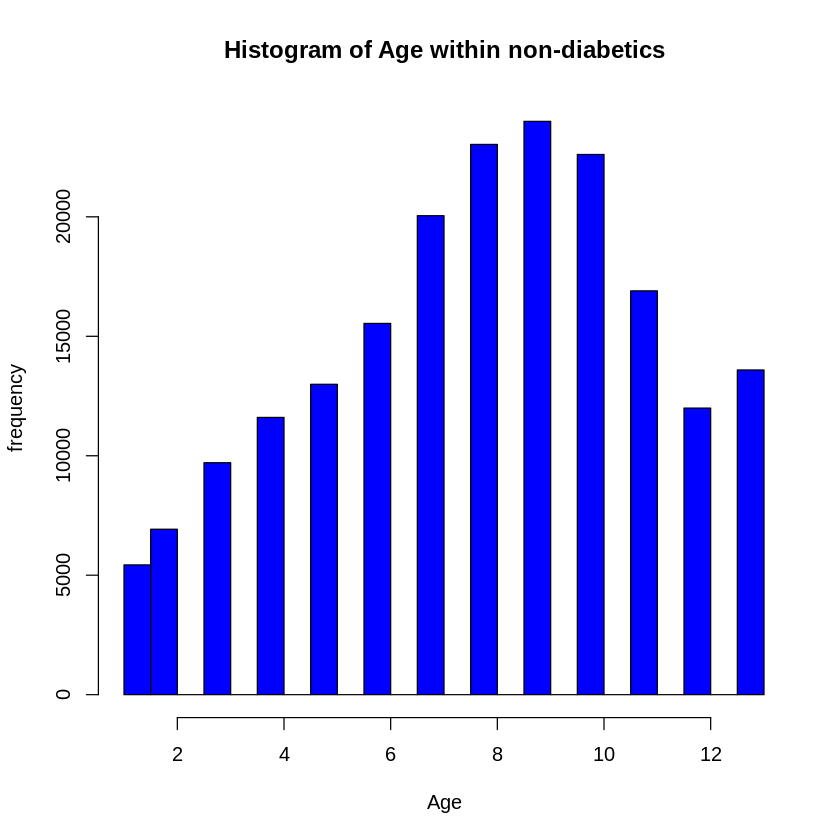

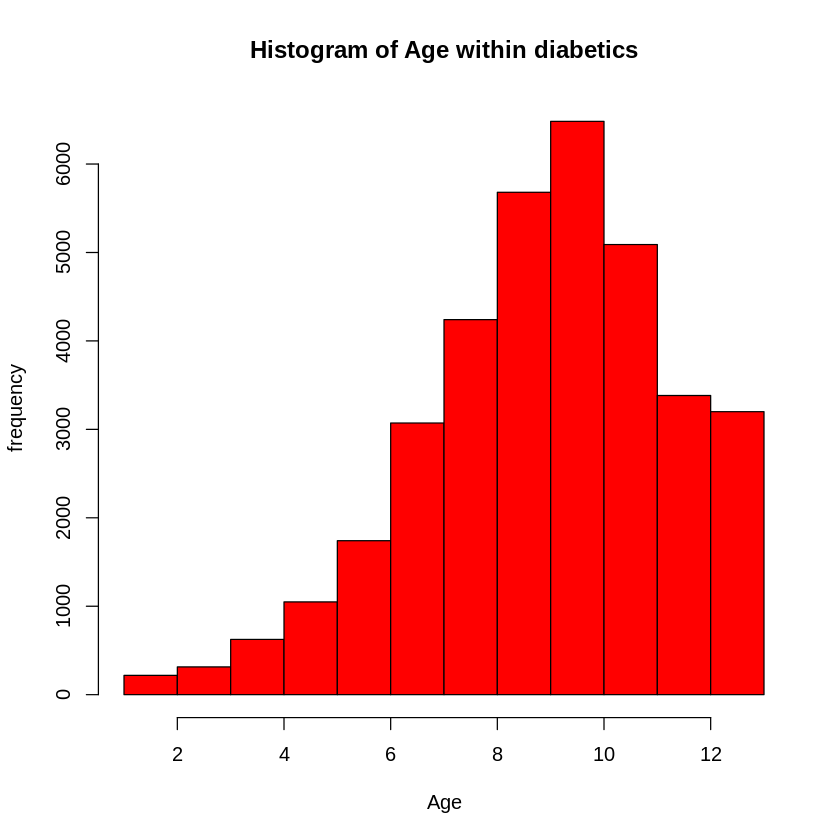

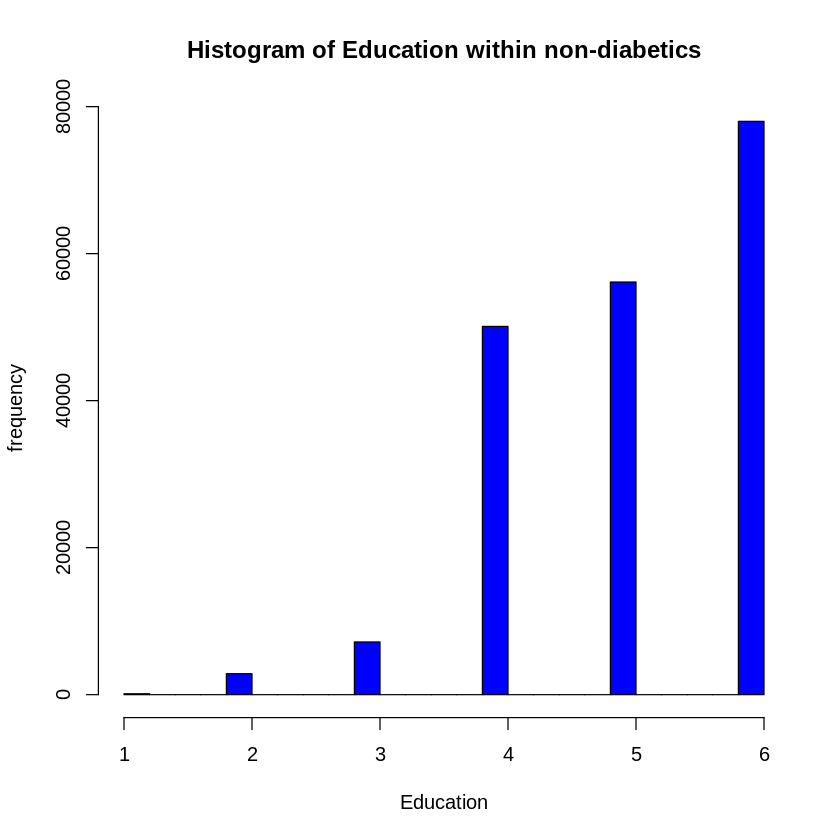

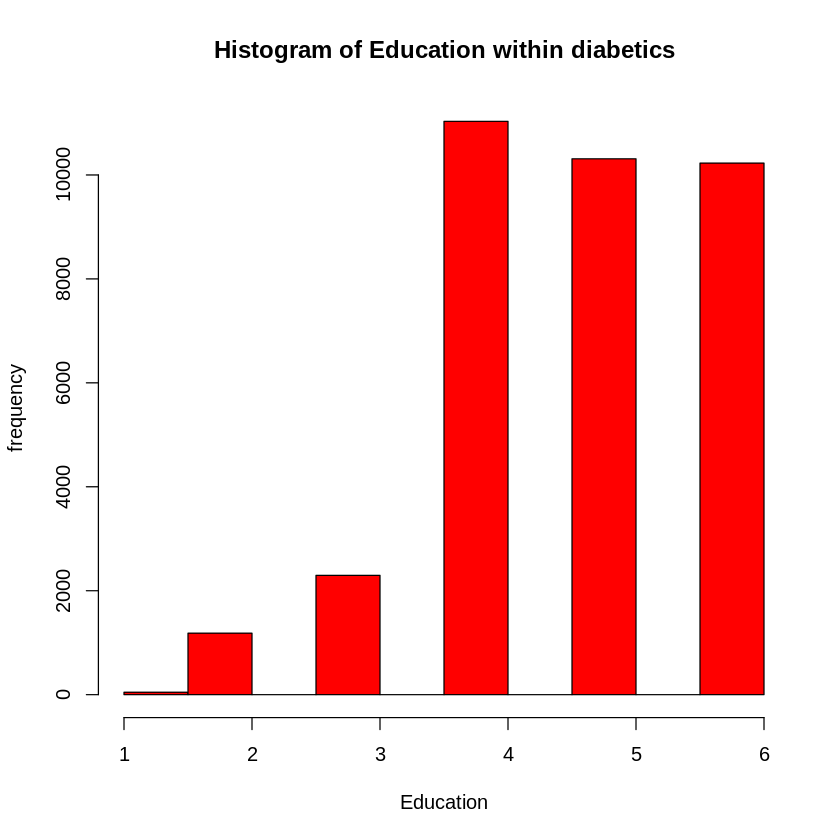

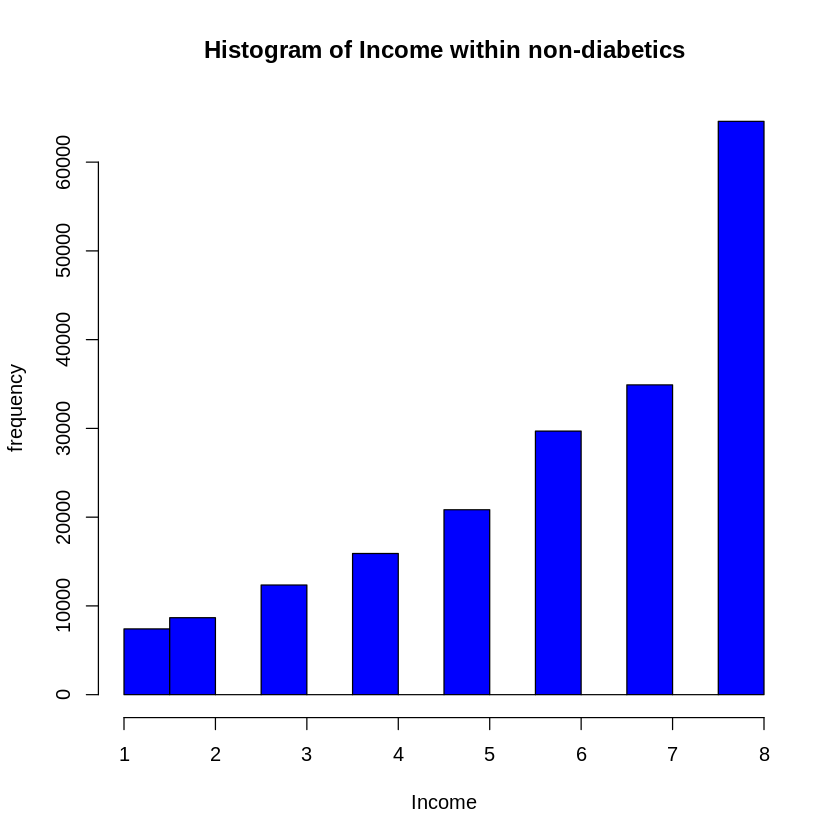

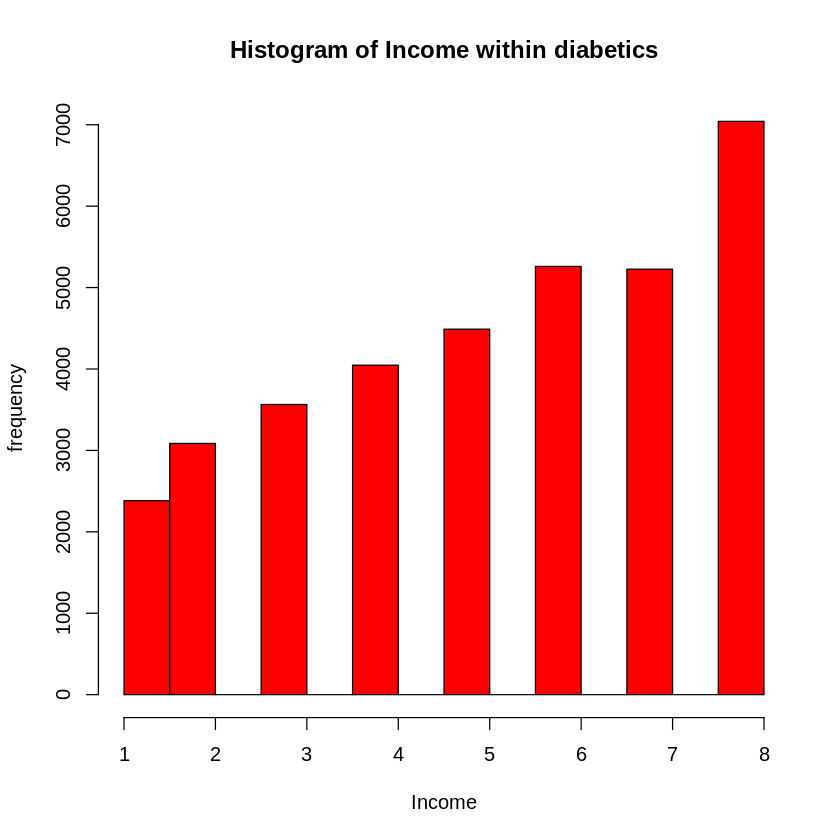

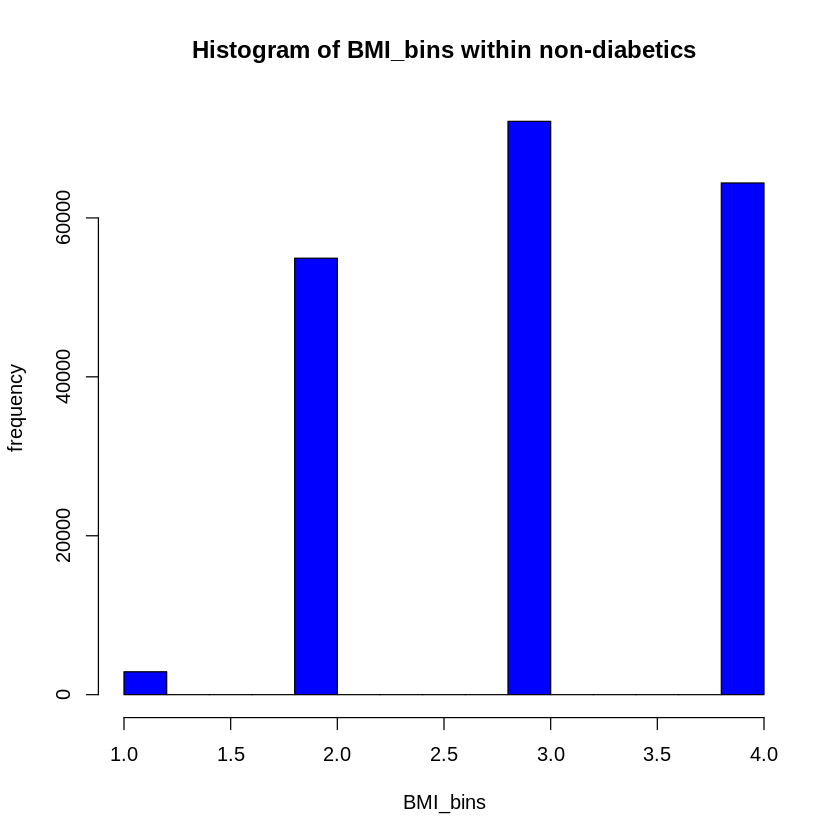

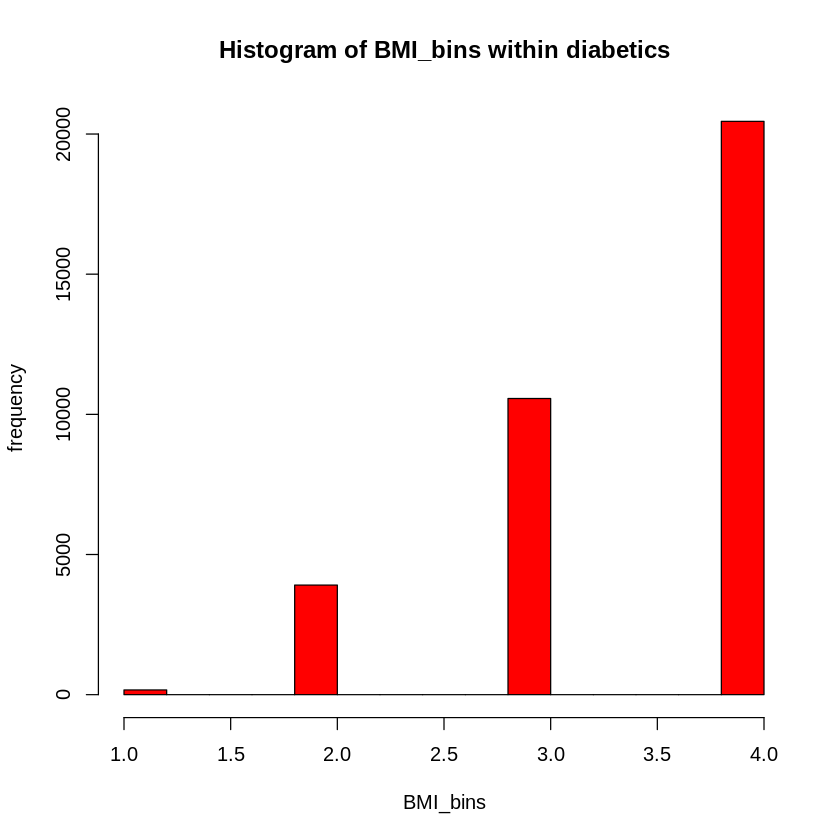

In [33]:
defaultW <- getOption("warn")
options(warn = -1)
for (x in num_vars){
    hist(df[,x][df$Diabetes_binary == 0], figsize = c(10,10),xlab =x, ylab = "frequency",title="",main = paste("Histogram of", x,"within non-diabetics"),col = "blue")
    hist(df[,x][df$Diabetes_binary == 1], figsize = c(10,10),xlab =x, ylab = "frequency",title="",main = paste("Histogram of", x,"within diabetics"),col = "red")

}
options(warn = defaultW)

#Answer to question 1, continuation:

**in some of the numerical variables, distribution of data tends towards different values and sides with regards to binary decision of being diabetic**

checking some examples:
>diabetic people tend to be more obese<br/>
>they have less healthy lives in terms of General Health<br/>
>have less healthy bodies
>tend to live less than the other groups of people, sadly this makes the age distribution of them, a false young distributed information.

#Number of unique values within numerical data

In [34]:
listt <- c()
for (x in num_vars){
  listt <- append(listt,nrow(unique(df[x])))
}

In [35]:
listt

[1] 84  5 31 31 13  6  8  4

Warning message in plot.window(xlim, ylim, log = log, ...):
“"figsize" is not a graphical parameter”
Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
“"figsize" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"figsize" is not a graphical parameter”
Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
“"figsize" is not a graphical parameter”


       name value
1       BMI    84
2   GenHlth     5
3  MentHlth    31
4  PhysHlth    31
5       Age    13
6 Education     6
7    Income     8
8  BMI_bins     4


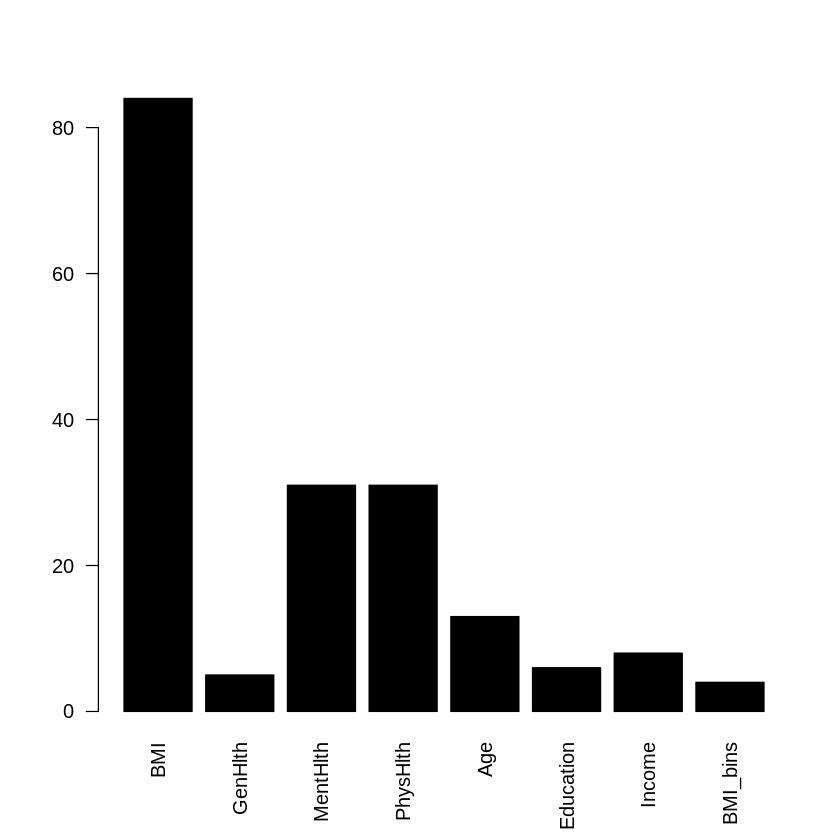

In [36]:
plt <- data.frame(name = num_vars,value = listt)
barplot(height=plt$value, names=plt$name, col="black",figsize=c(10,10),las=2)

print(plt)

##lets find out about the relation between different vairables

In [37]:
install.packages("rbokeh")
library("rbokeh")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘triebeard’, ‘urltools’, ‘httpcode’, ‘lobstr’, ‘crul’, ‘assertthat’, ‘maps’, ‘hexbin’, ‘pryr’, ‘gistr’




In [38]:
install.packages("corrplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [39]:
data_heatmap <- df
corr <- cor(data_heatmap, method = c("pearson", "kendall", "spearman"), use ="complete.obs")

corrplot 0.92 loaded



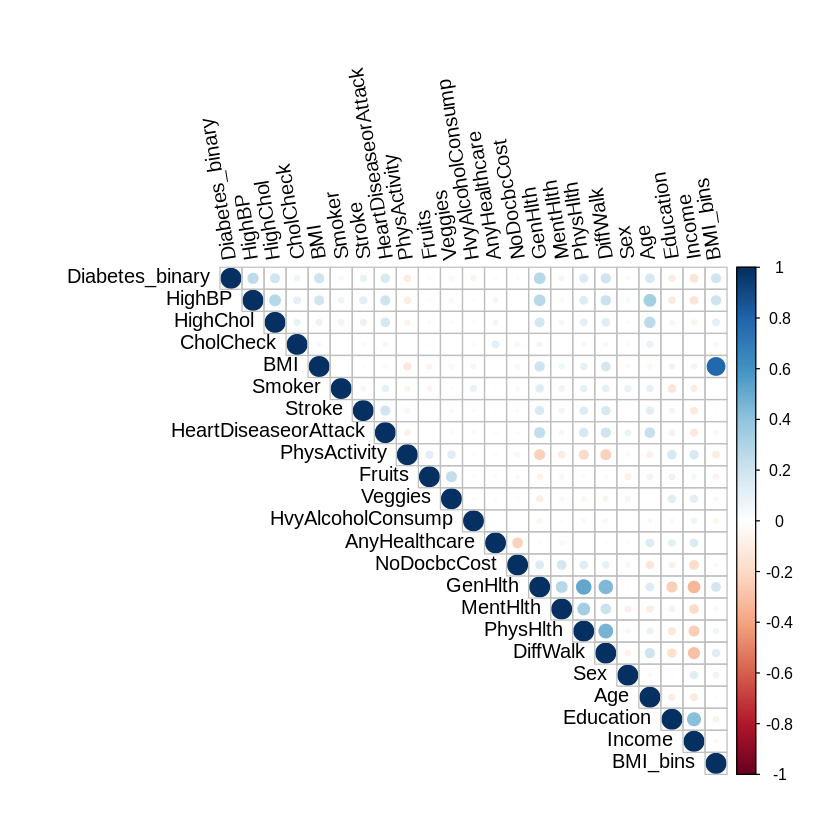

In [40]:
library(corrplot)
corrplot(corr, type = "upper",
         tl.col = "black", tl.srt = 99)

              HighBP             HighChol            CholCheck 
          0.25431802           0.19494411           0.07252338 
                 BMI               Smoker               Stroke 
          0.20508596           0.04550399           0.09919330 
HeartDiseaseorAttack         PhysActivity               Fruits 
          0.16821317          -0.10040433          -0.02480534 
             Veggies    HvyAlcoholConsump        AnyHealthcare 
         -0.04173376          -0.06595002           0.02533134 
         NoDocbcCost              GenHlth             MentHlth 
          0.02004828           0.27693982           0.05415268 
            PhysHlth             DiffWalk                  Sex 
          0.15621083           0.20530219           0.03272416 
                 Age            Education               Income 
          0.17726335          -0.10268615          -0.14065874 
            BMI_bins 
          0.19437584 


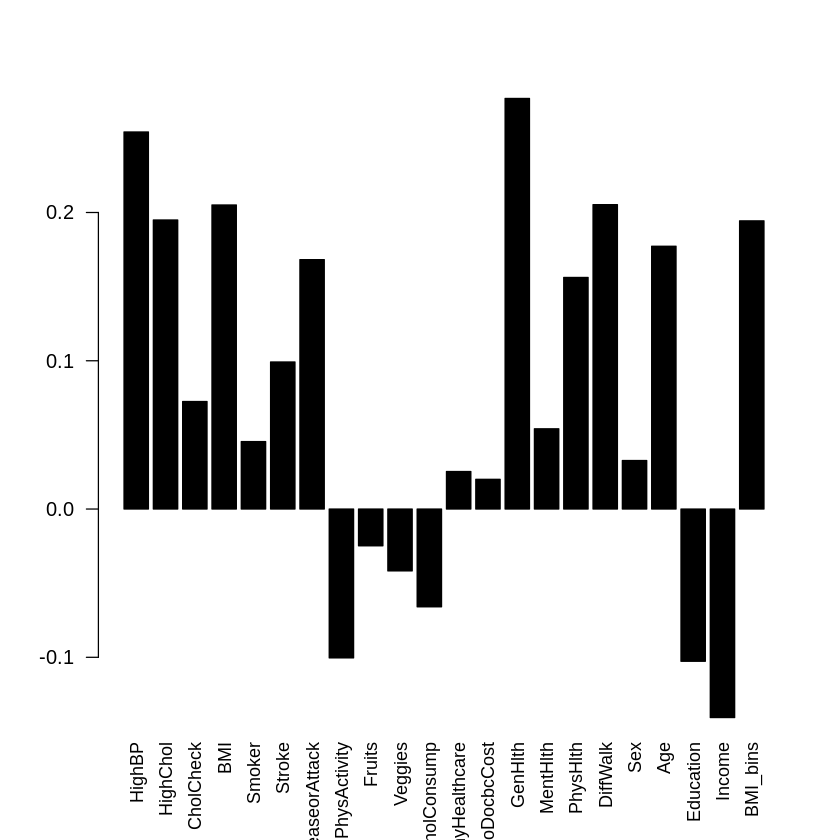

In [47]:
defaultW <- getOption("warn")
options(warn = -1)
corr_tar <- corr[,colnames(corr)[1]][-1]
barplot(height=corr_tar, names=colnames(corr_tar), col="black",cex.names = 0.9,las=2)

print(corr_tar)
options(warn = defaultW)

#Answer to question 3:
**These variables were more correlated with variable Diabetes_binary :**
>GenHlth <br/>
>HighBP <br/>
>DiffWalk <br/>
>BMI <br/>
>HighChol <br/>
>Age <br/>
>HeartDiseaseorAttack <br/>
>PhysHlth <br/>
>Physactivity <br/>
>Education <br/>
>Income <br/>

**But these variables had very weak correlation :**
>AnyHealthcare <br/>
>NoDocbcCost <br/>
>Fruits <br/>
>sex <br/>
>smoker<br/>
>Veggies<br/>


**primary assumption : those with noticable correlation are the to-go subset of variables**


lets take another look at GenHlth distribution plot

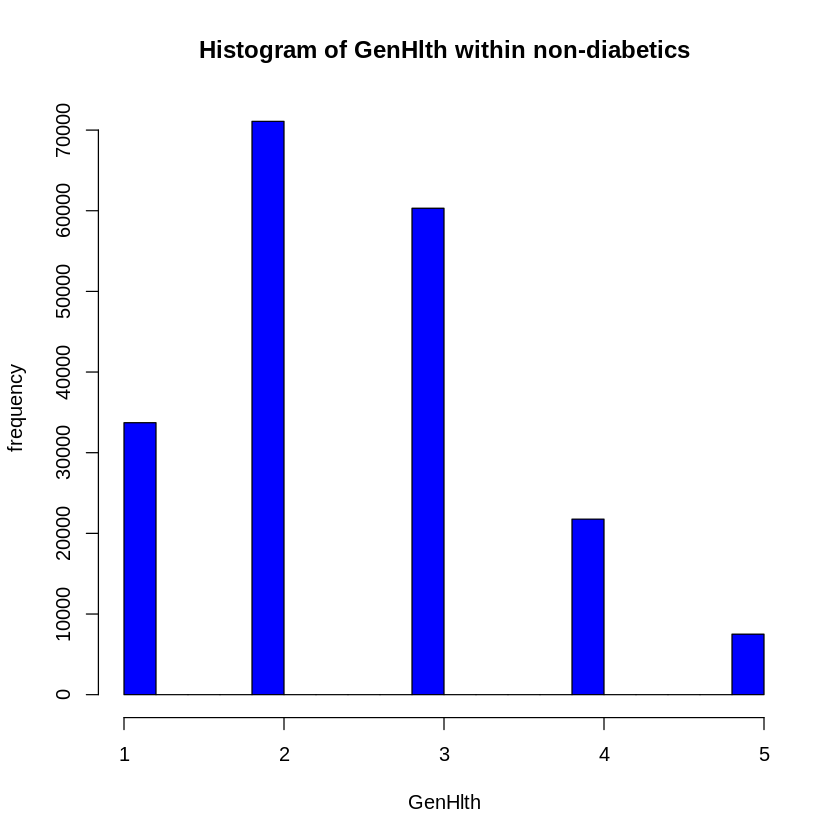

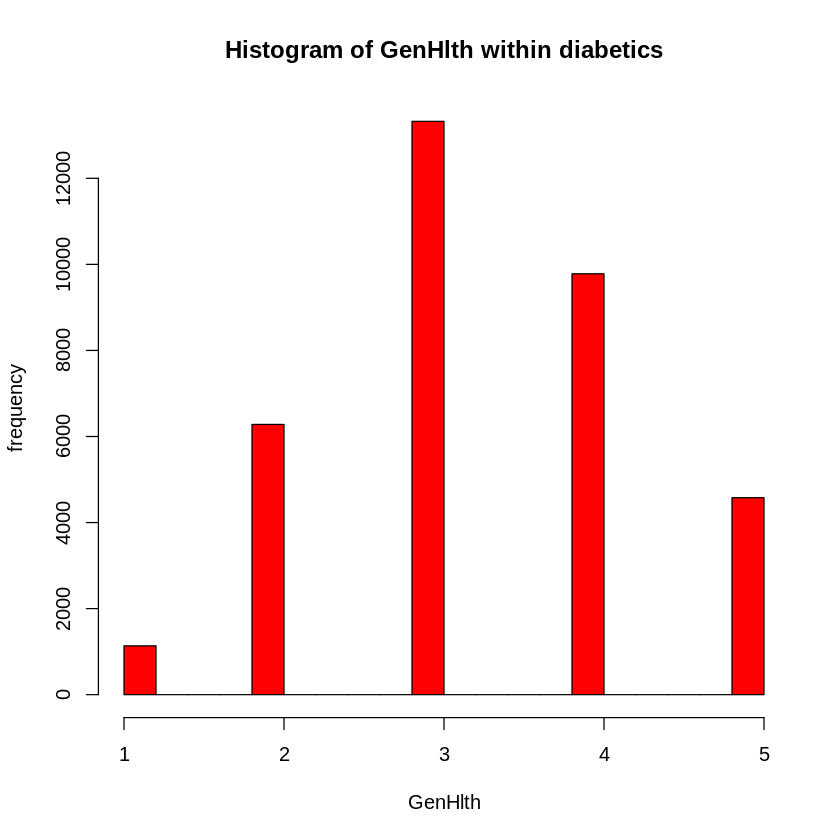

In [52]:
defaultW <- getOption("warn")
options(warn = -1)
hist(df[,"GenHlth"][df$Diabetes_binary == 0], figsize = c(10,10),xlab ="GenHlth", ylab = "frequency",title="",main = paste("Histogram of GenHlth within non-diabetics"),col = "blue")
hist(df[,"GenHlth"][df$Diabetes_binary == 1], figsize = c(10,10),xlab ="GenHlth", ylab = "frequency",title="",main = paste("Histogram of GenHlth within diabetics"),col = "red")

options(warn = defaultW)

**About this specific data:**
**the lower the value, the better the quality of health is, now it all becomes logical, those whom diabetes test turned out to be false, tend to live healthier.**

##fitting linear model and implementing BSS(Best Subset Selection)

In [49]:
install.packages("caret")
install.packages("leaps")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [50]:
library(tidyverse)
library(caret)
library(leaps)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




**we will report the top 5 best predictors using BSS method, note that the problem with this method is the linearity assumption of relations between label and predictors**

In [51]:
models <- regsubsets(Diabetes_binary~., data = df, nvmax = 7)
summary(models)

Subset selection object
Call: regsubsets.formula(Diabetes_binary ~ ., data = df, nvmax = 7)
22 Variables  (and intercept)
                     Forced in Forced out
HighBP                   FALSE      FALSE
HighChol                 FALSE      FALSE
CholCheck                FALSE      FALSE
BMI                      FALSE      FALSE
Smoker                   FALSE      FALSE
Stroke                   FALSE      FALSE
HeartDiseaseorAttack     FALSE      FALSE
PhysActivity             FALSE      FALSE
Fruits                   FALSE      FALSE
Veggies                  FALSE      FALSE
HvyAlcoholConsump        FALSE      FALSE
AnyHealthcare            FALSE      FALSE
NoDocbcCost              FALSE      FALSE
GenHlth                  FALSE      FALSE
MentHlth                 FALSE      FALSE
PhysHlth                 FALSE      FALSE
DiffWalk                 FALSE      FALSE
Sex                      FALSE      FALSE
Age                      FALSE      FALSE
Education                FALSE      FA

#Answer to question 2:
**using the BSS method seems like the top 7 predictors are as follows:**
>GenHlth <br/>
>HighBP<br/>
>BMI<br/>
>Age<br/>
>HighChol<br/>
>HeartDiseaseorAttack<br/>
>DiffWalk<br/>

#Preprocessing

##General Preprocessing

In [55]:
# function for the process the data if needed
drop_duplicates_and_reset_index <- function(df){
  dataframe <- df
  dataframe <- dataframe[!duplicated(dataframe),]
  dataframe <- dataframe[row.names(dataframe) <- NULL]
  return(dataframe)
}

#droping columns with extremely low correlation with classification variable
cols_list <- c('HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education',
       'Income')

X <- df[,cols_list]
y <- df$Diabetes_binary

# on unseen dataset
df2_clean <- data_clean(df2)
df2_y <- df2_clean$Diabetes_binary
df2_X <- df2_clean[,cols_list]

#scaler
X_scaled <- scale(X)

# on unseen dataset
df2_X_scaled <- scale(df2_X, center = attr(scaler, "scaled:center"), scale = attr(scaler, "scaled:scale"))

In [62]:
head(X_scaled)

HighBP,HighChol,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income
1.0958892,1.1244020,1.6662473,1.070906,-0.2166056,-0.3394773,-1.6570729,-0.2544124,2.2518926,1.87753357,1.1400863,2.0936894,0.2956684,-0.98665764,-1.3802052
-0.9124971,-0.8893578,-0.5431428,1.070906,-0.2166056,-0.3394773,0.6034711,-0.2544124,0.3738914,-0.45478471,-0.5172116,-0.4776237,-0.3506497,1.02746245,-2.3358226
1.0958892,1.1244020,-0.1012648,-0.933785,-0.2166056,-0.3394773,-1.6570729,-0.2544124,2.2518926,3.43241242,2.7973842,2.0936894,0.2956684,-0.98665764,1.0088382
1.0958892,-0.8893578,-0.2485574,-0.933785,-0.2166056,-0.3394773,0.6034711,-0.2544124,-0.5651091,-0.45478471,-0.5172116,-0.4776237,0.9419865,-1.99371768,0.0532208
1.0958892,1.1244020,-0.6904354,-0.933785,-0.2166056,-0.3394773,0.6034711,-0.2544124,-0.5651091,-0.06606499,-0.5172116,-0.4776237,0.9419865,0.02040241,-0.9023966
1.0958892,1.1244020,-0.5431428,1.070906,-0.2166056,-0.3394773,0.6034711,-0.2544124,-0.5651091,-0.45478471,-0.2962386,-0.4776237,0.6188275,1.02746245,1.0088382


##Train test split

y
     0      1 
194377  35097 

y_train
     0      1 
194377  35097 

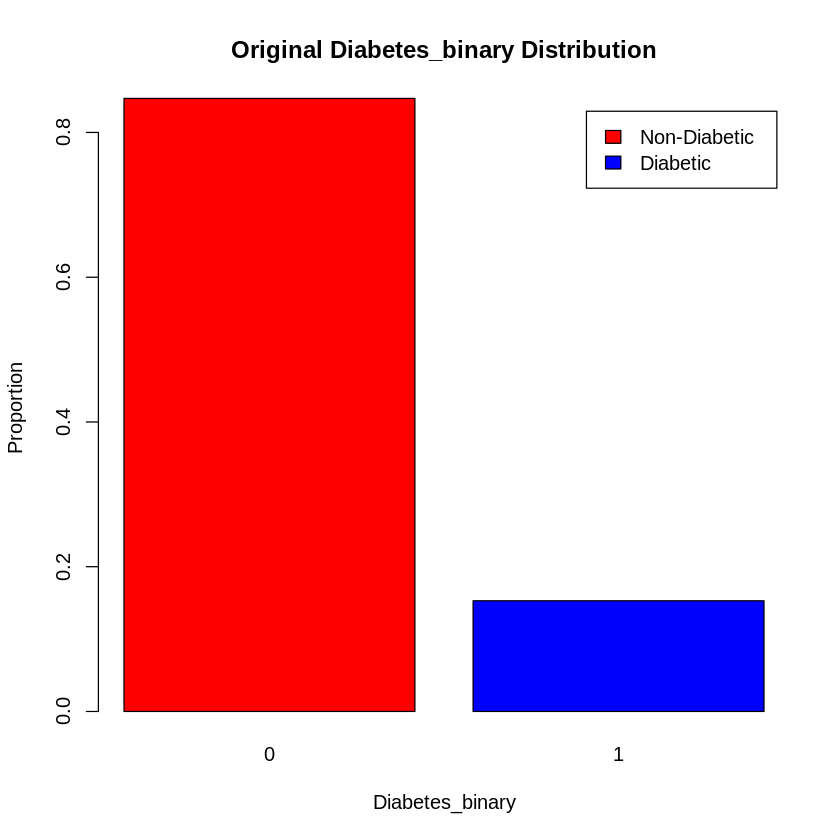

ERROR: ignored

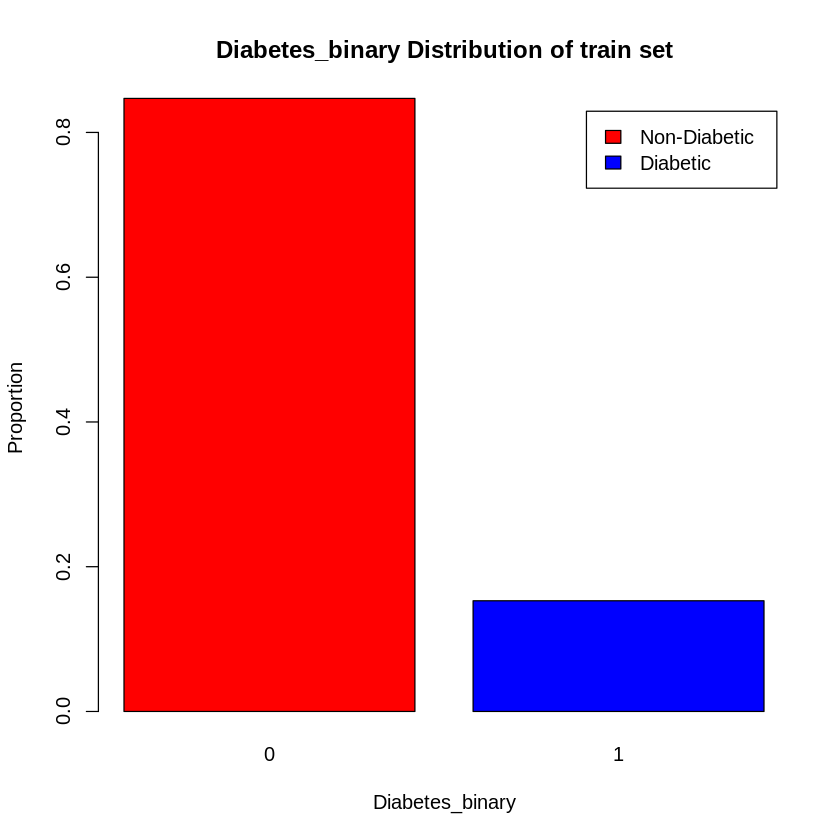

In [97]:
set.seed(10)

X <- df
sampler <- sample(nrow(X), 0.9*nrow(X),replace = FALSE, prob = NULL)

X_train <- X[sampler,]
X_test <- setdiff(X,X_train)

y_train <- df$Diabetes_binary
X_train <- X_train[,cols_list]

y_test <- X_test$Diabetes_binary
x_test <- X_test[,cols_list]

X_train <- scale(X_train)
X_test <- scale(X_test)

table(y)
barplot(table(y)/sum(table(y)), main = "Original Diabetes_binary Distribution", ylab = "Proportion", xlab = "Diabetes_binary", col = c("red", "blue"), legend = c("Non-Diabetic", "Diabetic"))

table(y_train)
barplot(table(y_train)/sum(table(y_train)), main = "Diabetes_binary Distribution of train set", ylab = "Proportion", xlab = "Diabetes_binary", col = c("red", "blue"), legend = c("Non-Diabetic", "Diabetic"))

clf_names <- c("RandomForest","LogisticRegression")
clf_list <- c(clf_rdf,clf_lr,)

imbalanced_perf <- classifiers_models_test(clf_names,clf_list)
cat("Imbalanced dataset")
imbalanced_perf

##SMOTE

In [111]:
install.packages("smotefamily")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘FNN’, ‘dbscan’, ‘igraph’




In [115]:
install.packages("performanceEstimation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [100]:
install.packages("randomForest")
install.packages("glmnet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’




In [116]:
library(caret)
library(performanceEstimation)
library(ggplot2)

In [ ]:
oversample <- smote(Diabetes_binary ~ ., df, perc.over = 100, k = 5)

In [ ]:
oversample

In [123]:
set.seed(10)

# Splitting the data into training and testing sets
data_split <- caret::createDataPartition(y, p = 0.1, list = FALSE)
# X_train <- X[data_split, ]
# X_test <- X[-data_split, ]
# y_train <- y[data_split]
# y_test <- y[-data_split]

# Oversampling using SMOTE
oversample <- smote(Diabetes_binary ~ ., df, perc.over = 50000, k = 5)

# X_train <- oversample$SMOTEed
# y_train <- oversample$SMOTEed[, ncol(oversample$SMOTEed)]

# # Scaling the data
# scaler <- caret::preProcess(X_train, method = c("center", "scale"))
# X_train <- predict(scaler, X_train)
# X_test <- predict(scaler, X_test)

# # Checking the original class distribution
# print(table(y))
# print()
# ggplot(data = data.frame(y = as.factor(y))) +
#   geom_bar(aes(x = y), fill = "steelblue") +
#   labs(title = "Original Diabetes_binary Distribution", y = "Count", x = "") +
#   theme_minimal()

# # Checking the class distribution after oversampling
# print(table(y_train))
# print()
# ggplot(data = data.frame(y = as.factor(y_train))) +
#   geom_bar(aes(x = y), fill = "steelblue") +
#   labs(title = "Diabetes_binary Distribution after oversampling of train set", y = "Count", x = "") +
#   theme_minimal()

ERROR: ignored

In [101]:
library(randomForest)
library(glmnet)

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-7



In [ ]:
clf_names2 <- c("RandomForest", "LogisticRegression")
clf_list2 <- list(randomForest(X_train, y_train),
                  glmnet(X_train, y_train, family = "binomial"))

# Function to evaluate model performance
classifiers_models_test <- function(names, models) {
  perf <- list()
  for (i in seq_along(names)) {
    model <- models[[i]]
    pred_train <- predict(model, newdata = X_train)
    pred_test <- predict(model, newdata = X_test)

    perf[[i]] <- list(
      Model = names[i],
      Train_Accuracy = sum(pred_train == y_train) / length(y_train),
      Test_Accuracy = sum(pred_test == y_test) / length(y_test)
    )
  }
  return(perf)
}

# Evaluating model performance
print()
smote_perf <- classifiers_models_test(clf_names2, clf_list2)
print("SMOTE")
print(smote_perf)

#Answer to question 4

#Train models

**several models are gonna be triained as:**
>logistic regression<br/>
>random forest<br/>

In [98]:
clf_rdf <- randomForest(random_state = 10)
clf_lr <- logisticRegression(max_iter = 500, random_state = 10)

ERROR: ignored

In [ ]:
set.seed(10)

# Random Forest Classifier
clf_rdf <- randomForest(X_train, y_train)
# Logistic Regression
clf_lr <- glm(y_train ~ ., data = data.frame(X_train, y_train), family = binomial(link = "logit"), maxit = 500)

# Note: The `max_iter` parameter in LogisticRegression is equivalent to `maxit` in glmnet

classifiers_models_test <- function(clf_names, clf_list) {
  info_clf <- list()
  for (count in seq_along(clf_list)) {
    clf <- clf_list[[count]]

    clf_fit <- clf %>% fit(X_train, y_train)

    # Predict on X_train
    y_pred_xtr <- predict(clf_fit, X_train)
    y_pred_proba_xtr <- predict_proba(clf_fit, X_train)[, 2]
    acc_score_xtr <- sum(y_train == y_pred_xtr) / length(y_train)
    auc_score_xtr <- roc_auc_score(y_train, y_pred_proba_xtr)
    rmse_xtr <- sqrt(mean((y_train - y_pred_xtr)^2))

    # Predict on X_test
    y_pred_xts <- predict(clf_fit, X_test)
    y_pred_proba_xts <- predict_proba(clf_fit, X_test)[, 2]
    acc_score_xts <- sum(y_test == y_pred_xts) / length(y_test)
    auc_score_xts <- roc_auc_score(y_test, y_pred_proba_xts)
    rmse_xts <- sqrt(mean((y_test - y_pred_xts)^2))

    # Predict on unseen dataset df2
    y_pred_un <- predict(clf_fit, df2_X_scaled)
    y_pred_proba_un <- predict_proba(clf_fit, df2_X_scaled)[, 2]
    acc_score_un <- sum(df2_y == y_pred_un) / length(df2_y)
    auc_score_un <- roc_auc_score(df2_y, y_pred_proba_un)
    rmse_un <- sqrt(mean((df2_y - y_pred_un)^2))

    info_clf[[count]] <- c(clf_names[count], acc_score_xtr, auc_score_xtr, rmse_xtr,
                           acc_score_xts, auc_score_xts, rmse_xts,
                           acc_score_un, auc_score_un, rmse_un)
  }

  info_df <- data.frame(do.call(rbind, info_clf))
  colnames(info_df) <- c("Model", "train_Accuracy", "train_AUC", "train_RMSE",
                         "test_Accuracy", "test_AUC", "test_RMSE",
                         "unseen_Accuracy", "unseen_AUC", "unseen_RMSE")
  return(info_df)
}

set.seed(508312)

split_data <- train_test_split(X, y, test_size = 0.1)
X_train <- scaler$transform(split_data$X_train)
X_test <- scaler$transform(split_data$X_test)

print(table(y))
cat("\n")
barplot(prop.table(table(y)), horiz = TRUE, xlim = c(0, 1), main = "Original Diabetes_binary Distribution",
        xlab = "Proportion", ylab = "Diabetes", las = 1, col = c("skyblue", "salmon"),
        names.arg = c("Non-Diabetic", "Diabetic"))
cat("\n")

print(table(split_data$y_train))
cat("\n")
barplot(prop.table(table(split_data$y_train)), horiz = TRUE, xlim = c(0, 1), main = "Diabetes_binary Distribution of train set",
        xlab = "Proportion", ylab = "Diabetes", las = 1, col = c("skyblue", "salmon"),
        names.arg = c("Non-Diabetic", "Diabetic"))
cat("\n")

clf_names <- c("RandomForest", "LogisticRegression")
clf_list <- list(clf_rdf, clf_lr)

imbalanced_perf <- classifiers_models_test(clf_names, clf_list)
cat("\nImbalanced dataset\n")
imbalanced_perf

In [ ]:
classifiers_models_test <- function(clf_names, clf_list){
  # For a given list of classfier name_list and object_list,
  # return model, ACC, AUC and RMSE Dataframe

  info_clf <- list()
  for (count in 1:length(clf_list)){
    clf <- clf_list[[count]]
    clf$fit(X_train, y_train)

    # predict X_train
    y_pred <- clf$predict(X_train)
    y_pred_proba <- clf$predict_proba(X_train)[,1]
    acc_score_xtr <- accuracy_score(y_train, y_pred)
    auc_score_xtr <- roc_auc_score(y_train,y_pred_proba)
    rmse_xtr <- sqrt(mean_squared_error(y_train, y_pred))

    # predict X_test
    y_pred <- clf$predict(X_test)
    y_pred_proba <- clf$predict_proba(X_test)[,1]
    acc_score_xts <- accuracy_score(y_test, y_pred)
    auc_score_xts <- roc_auc_score(y_test,y_pred_proba)
    rmse_xts <- sqrt(mean_squared_error(y_test, y_pred))

    # predict balanced unseen dataset df2
    y_pred <- clf$predict(df2_X_scaled)
    y_pred_proba <- clf$predict_proba(df2_X_scaled)[,1]
    acc_score_un <- accuracy_score(df2_y, y_pred)
    auc_score_un <- roc_auc_score(df2_y,y_pred_proba)

    # RMSE score of the results in unseen dataset df2
    rmse_un <- sqrt(mean_squared_error(

##results

###validation

####confusion matrix, classification report,auc curve,prec_recall curve, accuracy

#Answer to question 3:

##final feature selection

#Answer to question 5